# Pulsar Star Analysis
#### Members
##### Alex Lee, Lavender Yu, Brian Kong, Ayasha Abdalla-Wyse

## Introduction

Pulsars are highly magnetic neutron stars that emit periodic radio frequencies. They are “dead stars” that are larger than the sun, run out of fuel and collapse themselves. They are used to test general relativity[1], and map gravitational wave signatures[2]. However, there are lots of man-made sources of radio frequency interferences that mimic the pulsars’ signals. From our HTRU2 data set which “describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey”, we want to know whether the source of the radiation is a pulsar or noise.

Our dataset contains 16,259 spurious examples caused by RFI/noise and 1,639 real pulsar examples. The integrated profile (IP) is created by stacking individual bursts of emission from a pulsar[3], but because the pulse arrives at different times across different radio frequencies, scientists account for this via the DM-SNR curve[4].

The variables (appears once each for the IP and DM-SNR curve) are:

* Mean
* Standard Deviation
* Excess kurtosis
* Skewness 

### Preliminary exploratory data analysis:

In [80]:
library(tidyverse)
library(repr)
library(tidymodels)
library(caret)
library("GGally")
library(gridExtra)
options(repr.matrix.max.rows = 6)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




### Activity #1: Explore Datasets - Preliminary

#### Questions:
* What is the dataset about?
* How many variables are there?
* How many observations are there?

In [81]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip"

temp <- tempfile()
temp_2 <- tempfile()

download.file(url, temp)
unzip(zipfile = temp, exdir = temp_2)

pulsar <- read_csv(file.path(temp_2, "HTRU_2.csv"), 
                   col_names = c("Mean.of.the.integrated.profile", "Standard.deviation.of.the.integrated.profile", 
                                 "Excess.kurtosis.of.the.integrated.profile", "Skewness.of.the.integrated.profile",
                                "Mean.of.the.DM.SNR.curve", "Standard.deviation.of.the.DM.SNR.curve",
                                "Excess.kurtosis.of.the.DM.SNR.curve", "Skewness.of.the.DM.SNR.curve",
                                "target_class")) 

pulsar

Parsed with column specification:
cols(
  Mean.of.the.integrated.profile = col_double(),
  Standard.deviation.of.the.integrated.profile = col_double(),
  Excess.kurtosis.of.the.integrated.profile = col_double(),
  Skewness.of.the.integrated.profile = col_double(),
  Mean.of.the.DM.SNR.curve = col_double(),
  Standard.deviation.of.the.DM.SNR.curve = col_double(),
  Excess.kurtosis.of.the.DM.SNR.curve = col_double(),
  Skewness.of.the.DM.SNR.curve = col_double(),
  target_class = col_double()
)



Mean.of.the.integrated.profile
1     140.5625                      
2     102.5078                      
3     103.0156                      
⋮     ⋮                             
17896 119.3359                      
17897 114.5078                      
17898  57.0625                      
      Standard.deviation.of.the.integrated.profile
1     55.68378                                    
2     58.88243                                    
3     39.34165                                    
⋮     ⋮                                           
17896 59.93594                                    
17897 53.90240                                    
17898 85.79734                                    
      Excess.kurtosis.of.the.integrated.profile
1     -0.2345714                               
2      0.4653182                               
3      0.3233284                               
⋮     ⋮                                        
17896 0.1593631                                
17897 0.2011614                                
17898 1.4063910                                
      Skewness.of.the.integrated.profile Mean.of.the.DM.SNR.curve
1     -0.6996484                         3.199833                
2     -0.5150879                         1.677258                
3      1.0511644                         3.121237                
⋮     ⋮                                  ⋮                       
17896 -0.74302540                         21.430602              
17897 -0.02478884                          1.946488              
17898  0.08951971                        188.306020              
      Standard.deviation.of.the.DM.SNR.curve
1     19.11043                              
2     14.86015                              
3     21.74467                              
⋮     ⋮                                     
17896 58.87200                              
17897 13.38173                              
17898 64.71256                              
      Excess.kurtosis.of.the.DM.SNR.curve Skewness.of.the.DM.SNR.curve
1      7.975532                            74.24222                   
2     10.576487                           127.39358                   
3      7.735822                            63.17191                   
⋮     ⋮                                   ⋮                           
17896  2.499517                             4.595173                  
17897 10.007967                           134.238910                  
17898 -1.597527                             1.429475                  
      target_class
1     0           
2     0           
3     0           
⋮     ⋮           
17896 0           
17897 0           
17898 0

#### Answer:
Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter. Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted,which treat the candidate data sets as binary classification problems.

The columns of this dataset are:

- `Mean.of.the.integrated.profile` - Mean of the integrated profile
- `Standard.deviation.of.the.integrated.profile` - Standard deviation of the integrated profile
- `Excess.kurtosis.of.the.integrated.profile` - Excess kurtosis of the integrated profile
- `Skewness.of.the.integrated.profile` - Skewness of the integrated profile
- `Mean.of.the.DM.SNR.curve` - Mean of the DM-SNR curve. 
- `Standard.deviation.of.the.DM.SNR.curve` - Standard deviation of the DM-SNR curve
- `Excess.kurtosis.of.the.DM.SNR.curve` - Excess kurtosis of the DM-SNR curve
- `Skewness.of.the.DM.SNR.curve` - Skewness of the DM-SNR curve
- `target_class` - Class

The original dataset can be acquired here:
* https://www.kaggle.com/colearninglounge/predicting-pulsar-starintermediate
* https://archive.ics.uci.edu/ml/datasets/HTRU2

There are 9 variables and 12529 observations within this dataset. 

### Activity #2: Explore Datasets Part 2 - Outcome Variable

#### Questions:
* Identify the main outcome/categorical/label variable in the dataset.
* How many values/groups are in this variable?
* How many observations are there in each value/group?

In [82]:
pulsar <- pulsar %>%
        mutate(target_class = as_factor(target_class))
pulsar

Mean.of.the.integrated.profile
1     140.5625                      
2     102.5078                      
3     103.0156                      
⋮     ⋮                             
17896 119.3359                      
17897 114.5078                      
17898  57.0625                      
      Standard.deviation.of.the.integrated.profile
1     55.68378                                    
2     58.88243                                    
3     39.34165                                    
⋮     ⋮                                           
17896 59.93594                                    
17897 53.90240                                    
17898 85.79734                                    
      Excess.kurtosis.of.the.integrated.profile
1     -0.2345714                               
2      0.4653182                               
3      0.3233284                               
⋮     ⋮                                        
17896 0.1593631                                
17897 0.2011614                                
17898 1.4063910                                
      Skewness.of.the.integrated.profile Mean.of.the.DM.SNR.curve
1     -0.6996484                         3.199833                
2     -0.5150879                         1.677258                
3      1.0511644                         3.121237                
⋮     ⋮                                  ⋮                       
17896 -0.74302540                         21.430602              
17897 -0.02478884                          1.946488              
17898  0.08951971                        188.306020              
      Standard.deviation.of.the.DM.SNR.curve
1     19.11043                              
2     14.86015                              
3     21.74467                              
⋮     ⋮                                     
17896 58.87200                              
17897 13.38173                              
17898 64.71256                              
      Excess.kurtosis.of.the.DM.SNR.curve Skewness.of.the.DM.SNR.curve
1      7.975532                            74.24222                   
2     10.576487                           127.39358                   
3      7.735822                            63.17191                   
⋮     ⋮                                   ⋮                           
17896  2.499517                             4.595173                  
17897 10.007967                           134.238910                  
17898 -1.597527                             1.429475                  
      target_class
1     0           
2     0           
3     0           
⋮     ⋮           
17896 0           
17897 0           
17898 0

#### Answers:
* The main outcome/categorical/label variable would be "target_class".
* There are two groups in this variable, 0.0 and 1.0.
* There are 12529 observations.

### Activity #3: Explore Datasets Part 3 - Visualisations!

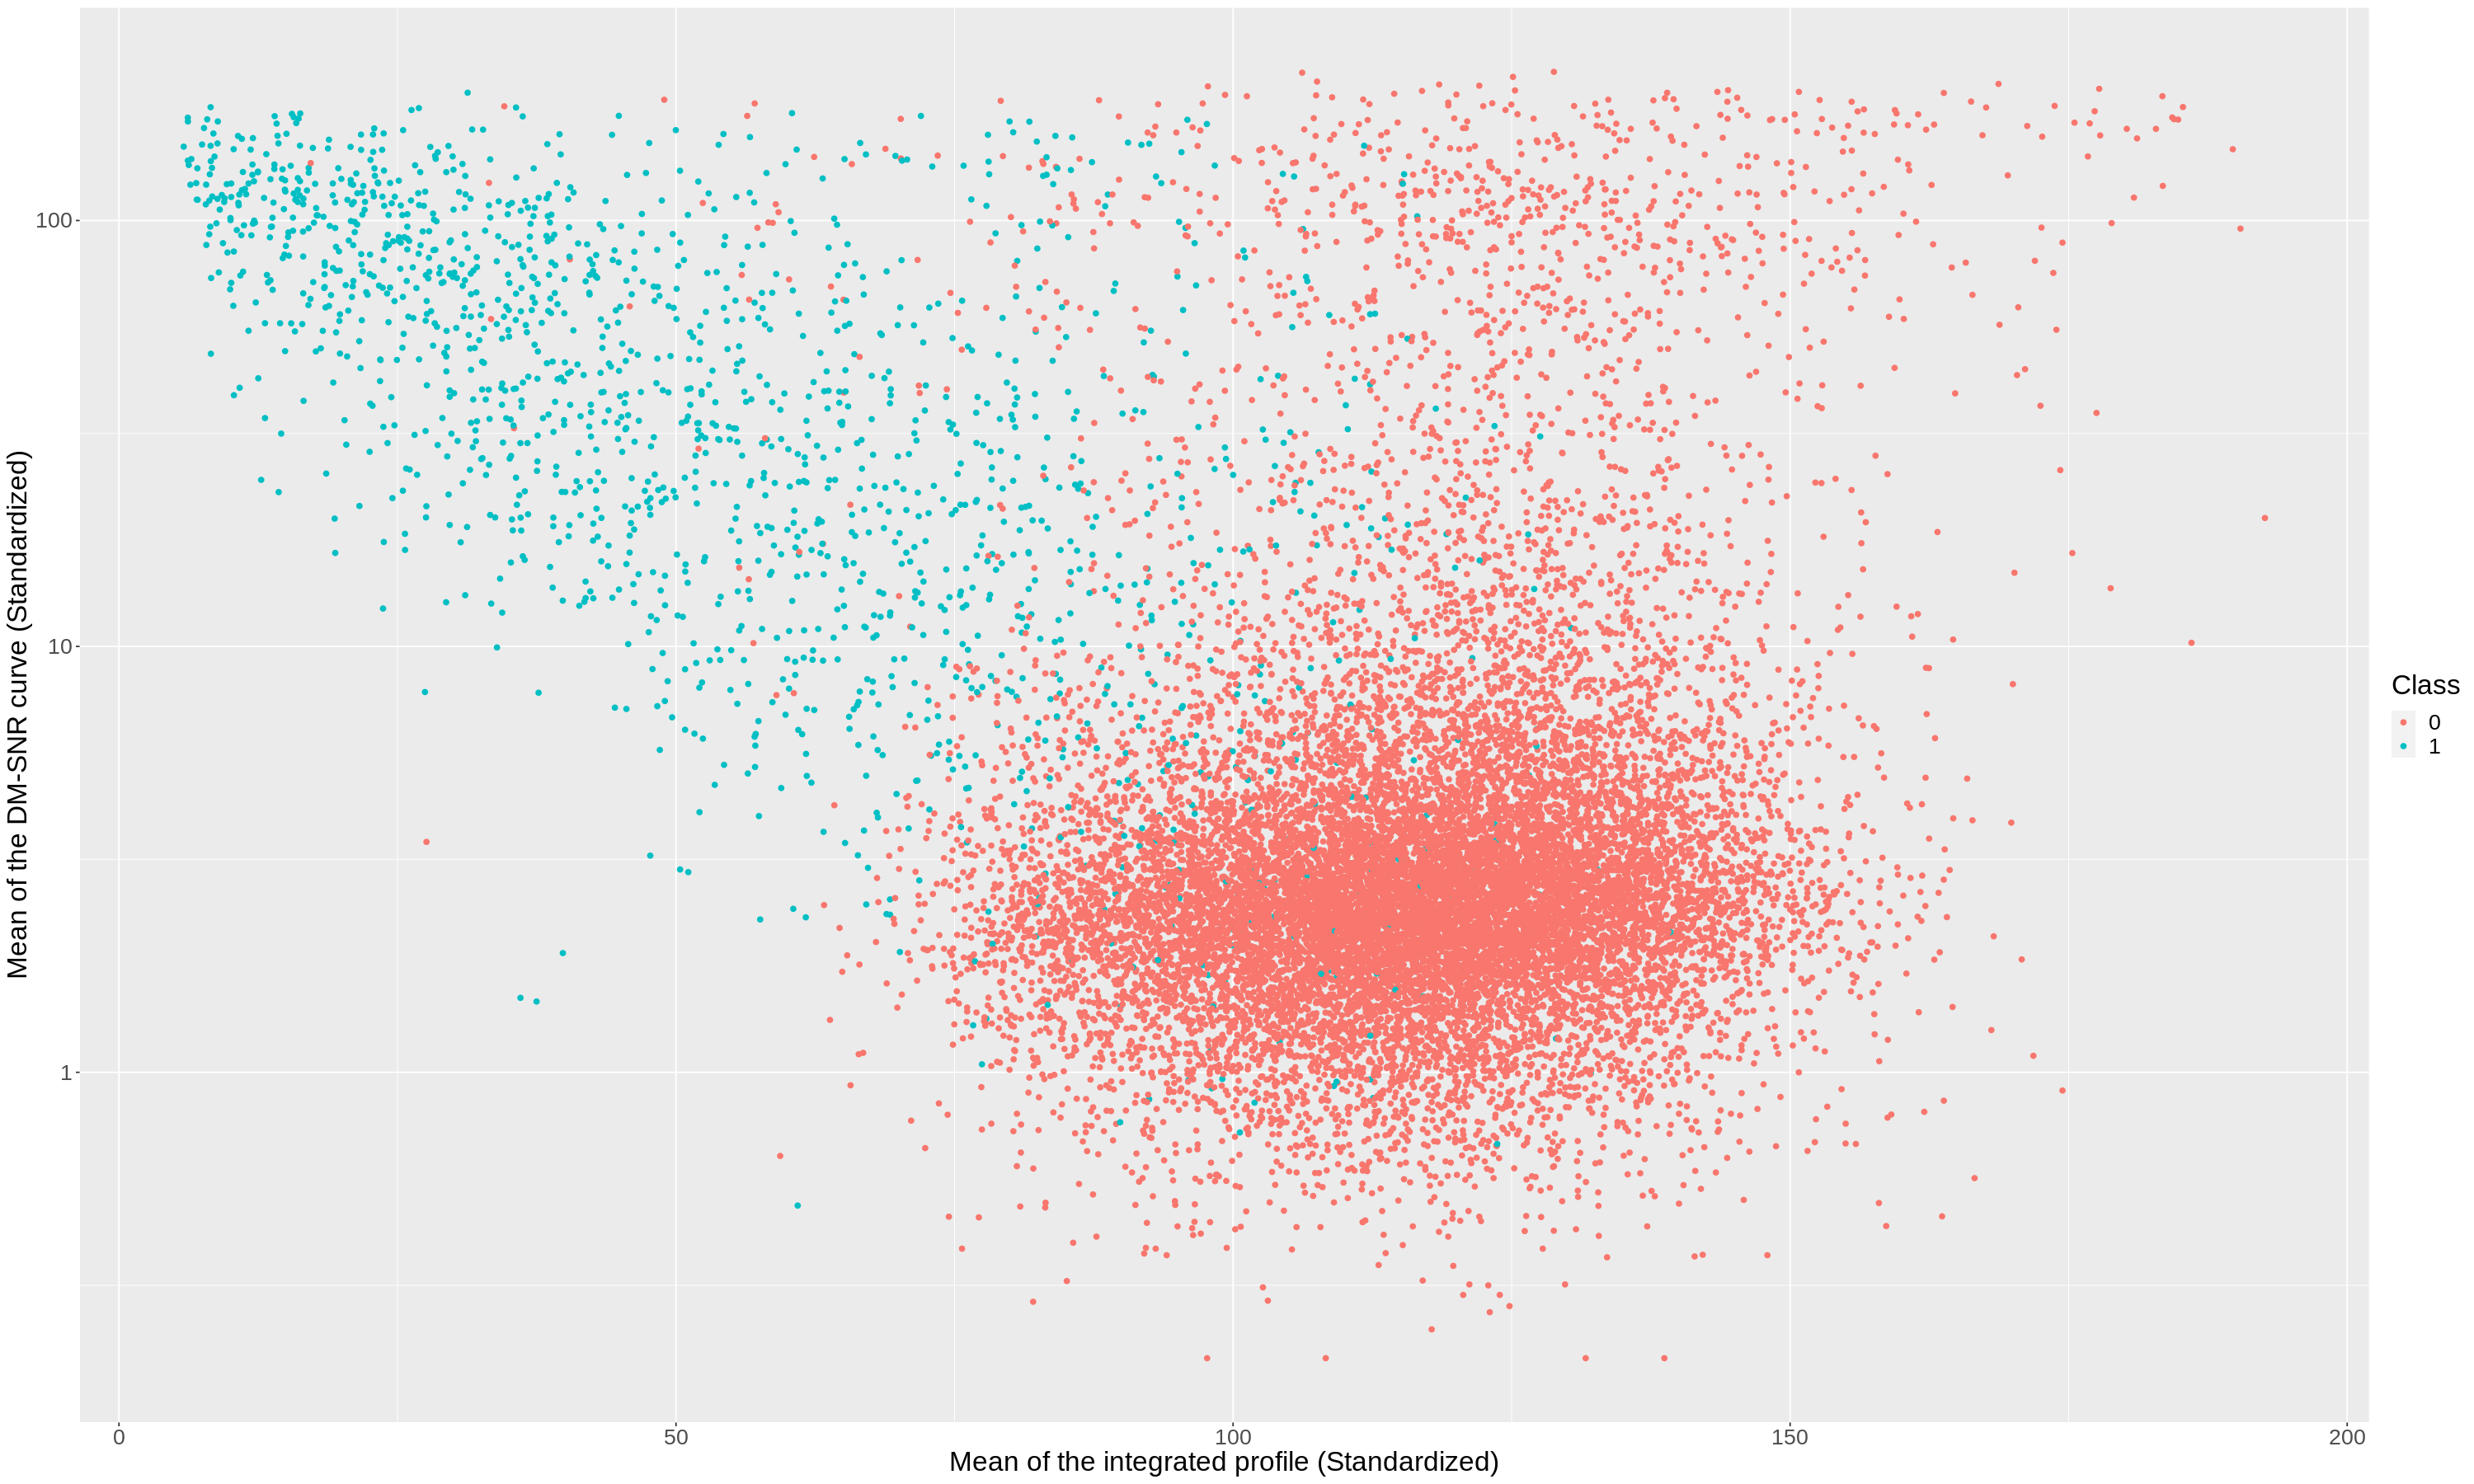

In [83]:
options(repr.plot.width = 25, repr.plot.height = 15) 

pulsar_mean_plot <- pulsar %>%
        ggplot(aes(x = Mean.of.the.integrated.profile, y = Mean.of.the.DM.SNR.curve)) +
        geom_point(aes(color = target_class)) +
        labs(x = "Mean of the integrated profile (Standardized)", y = "Mean of the DM-SNR curve (Standardized)", color = "Class") +
        theme(text = element_text(size = 20)) +
        scale_y_log10()
pulsar_mean_plot

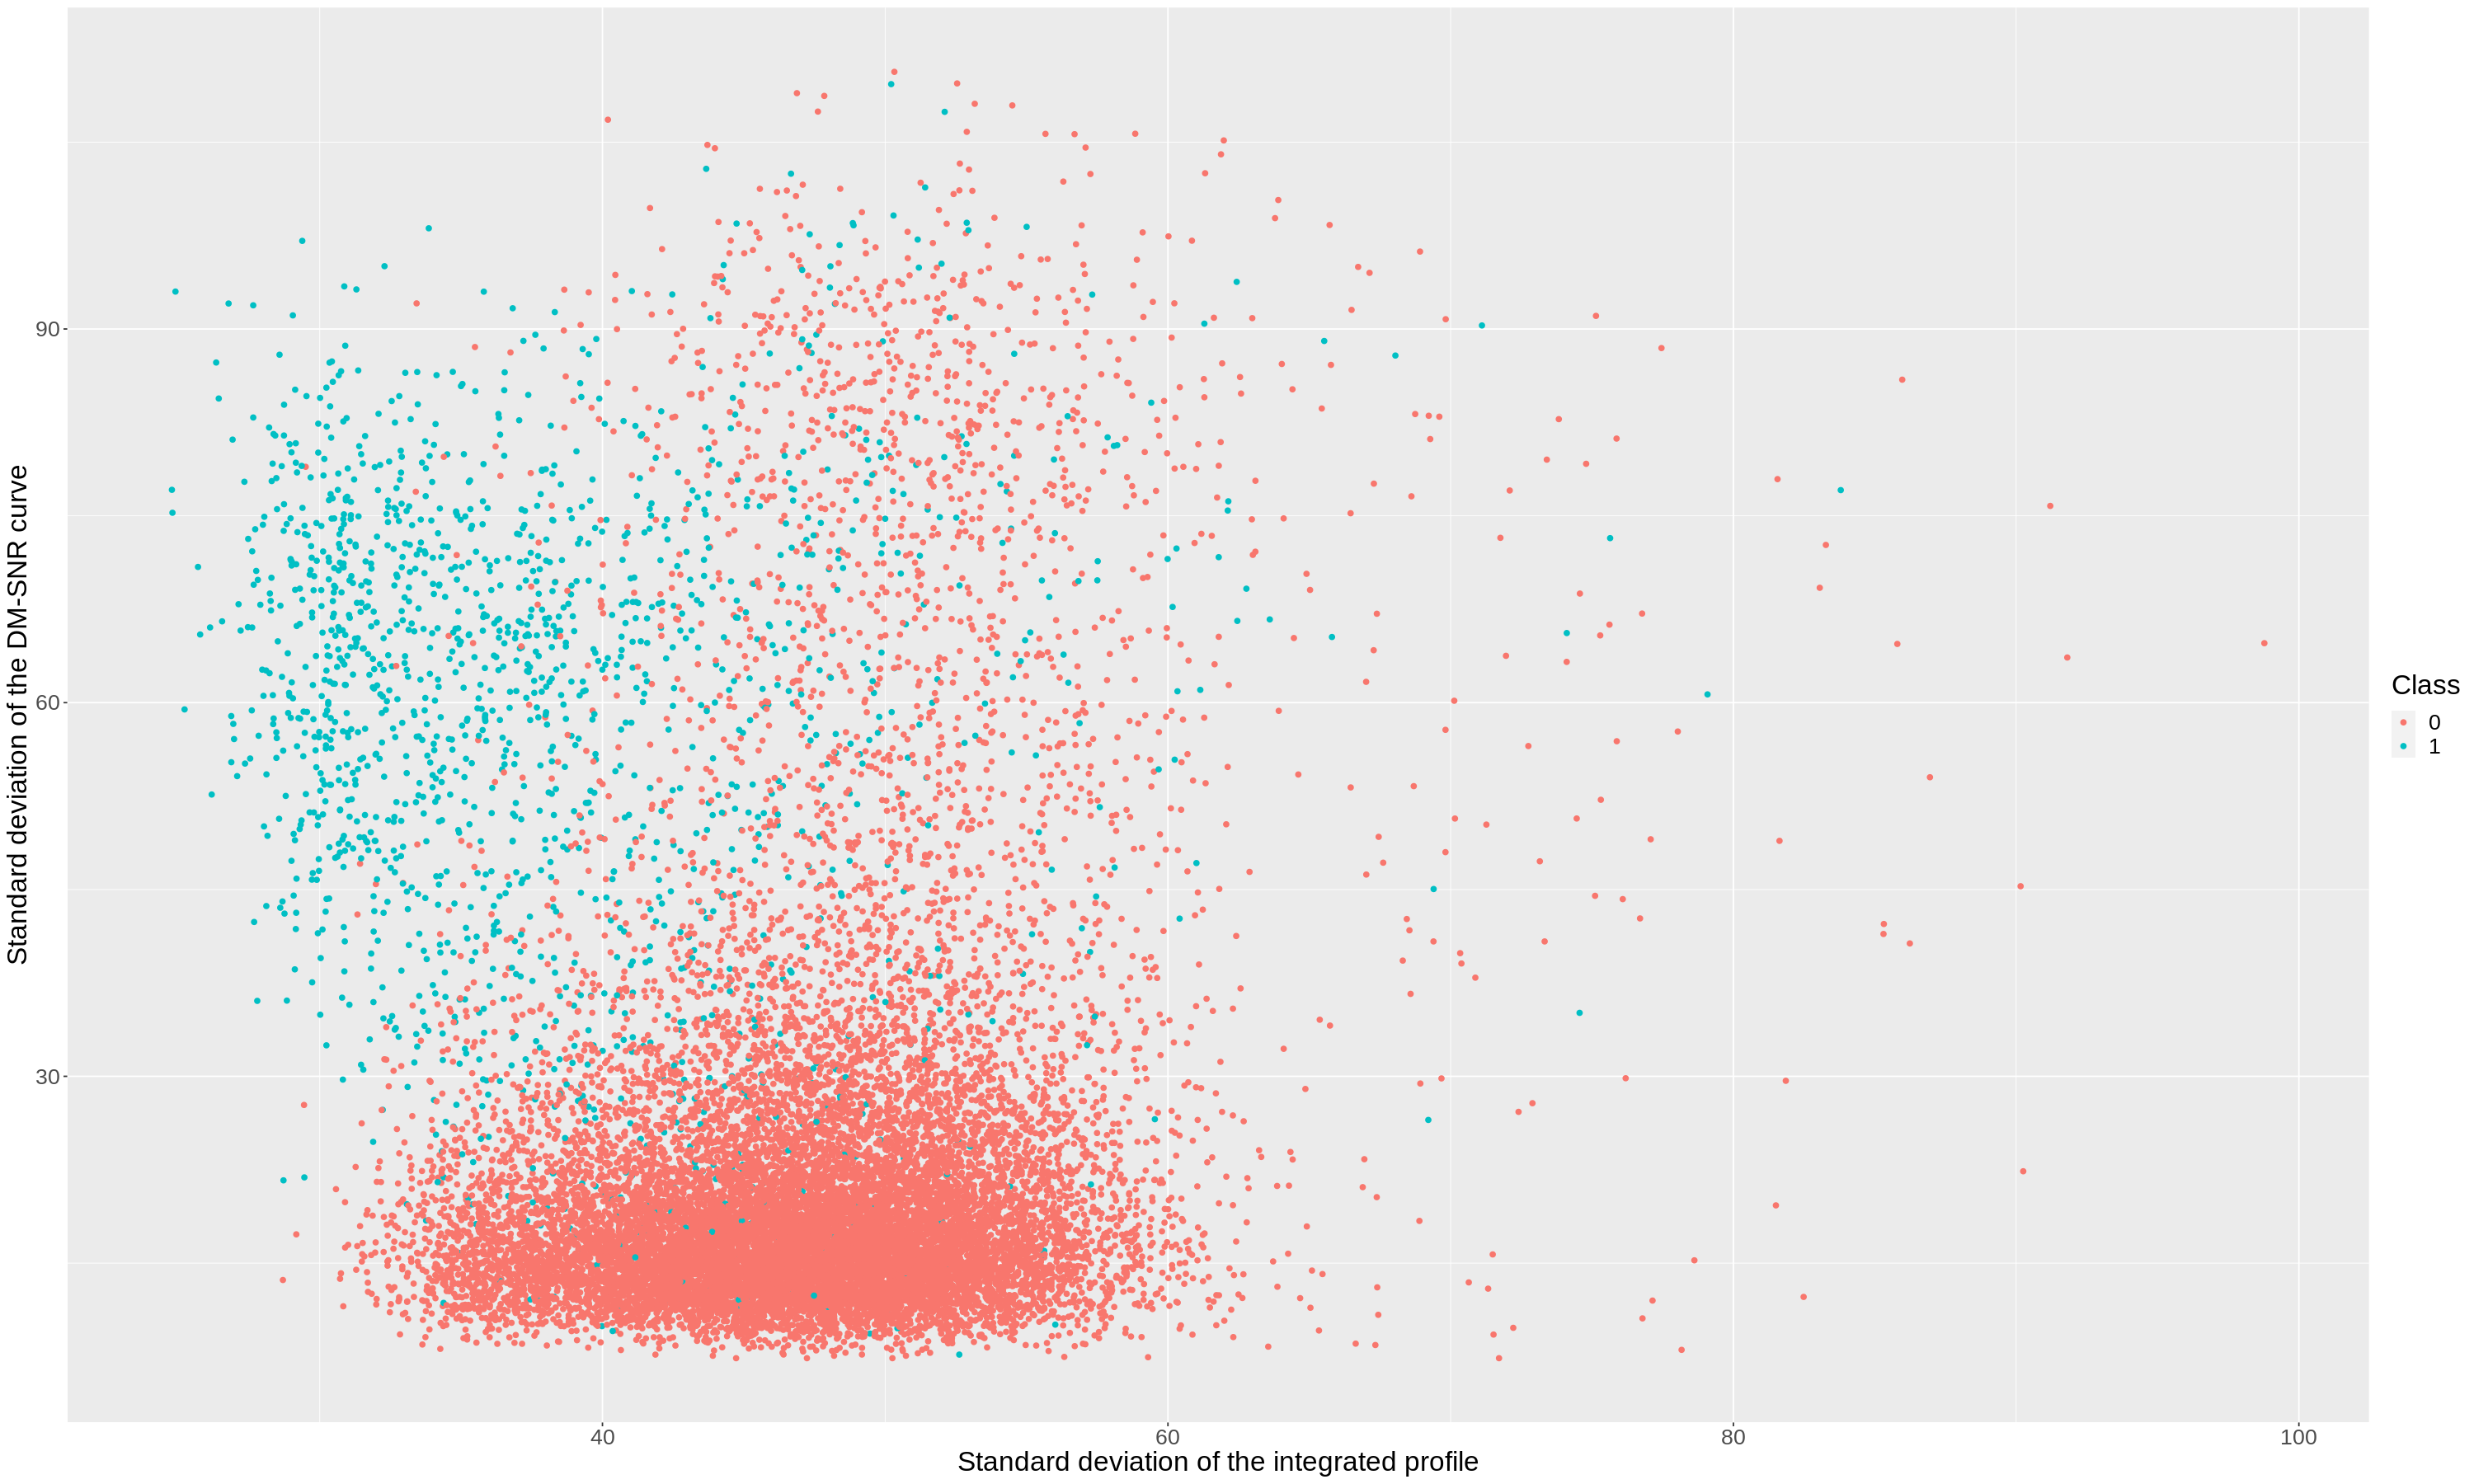

In [84]:
pulsar_standard_plot <- pulsar %>%
        ggplot(aes(x = Standard.deviation.of.the.integrated.profile, y = Standard.deviation.of.the.DM.SNR.curve)) +
        geom_point(aes(color = target_class)) +
        labs(x = "Standard deviation of the integrated profile", y = "Standard deviation of the DM-SNR curve", color = "Class") +
        theme(text = element_text(size = 20))
pulsar_standard_plot

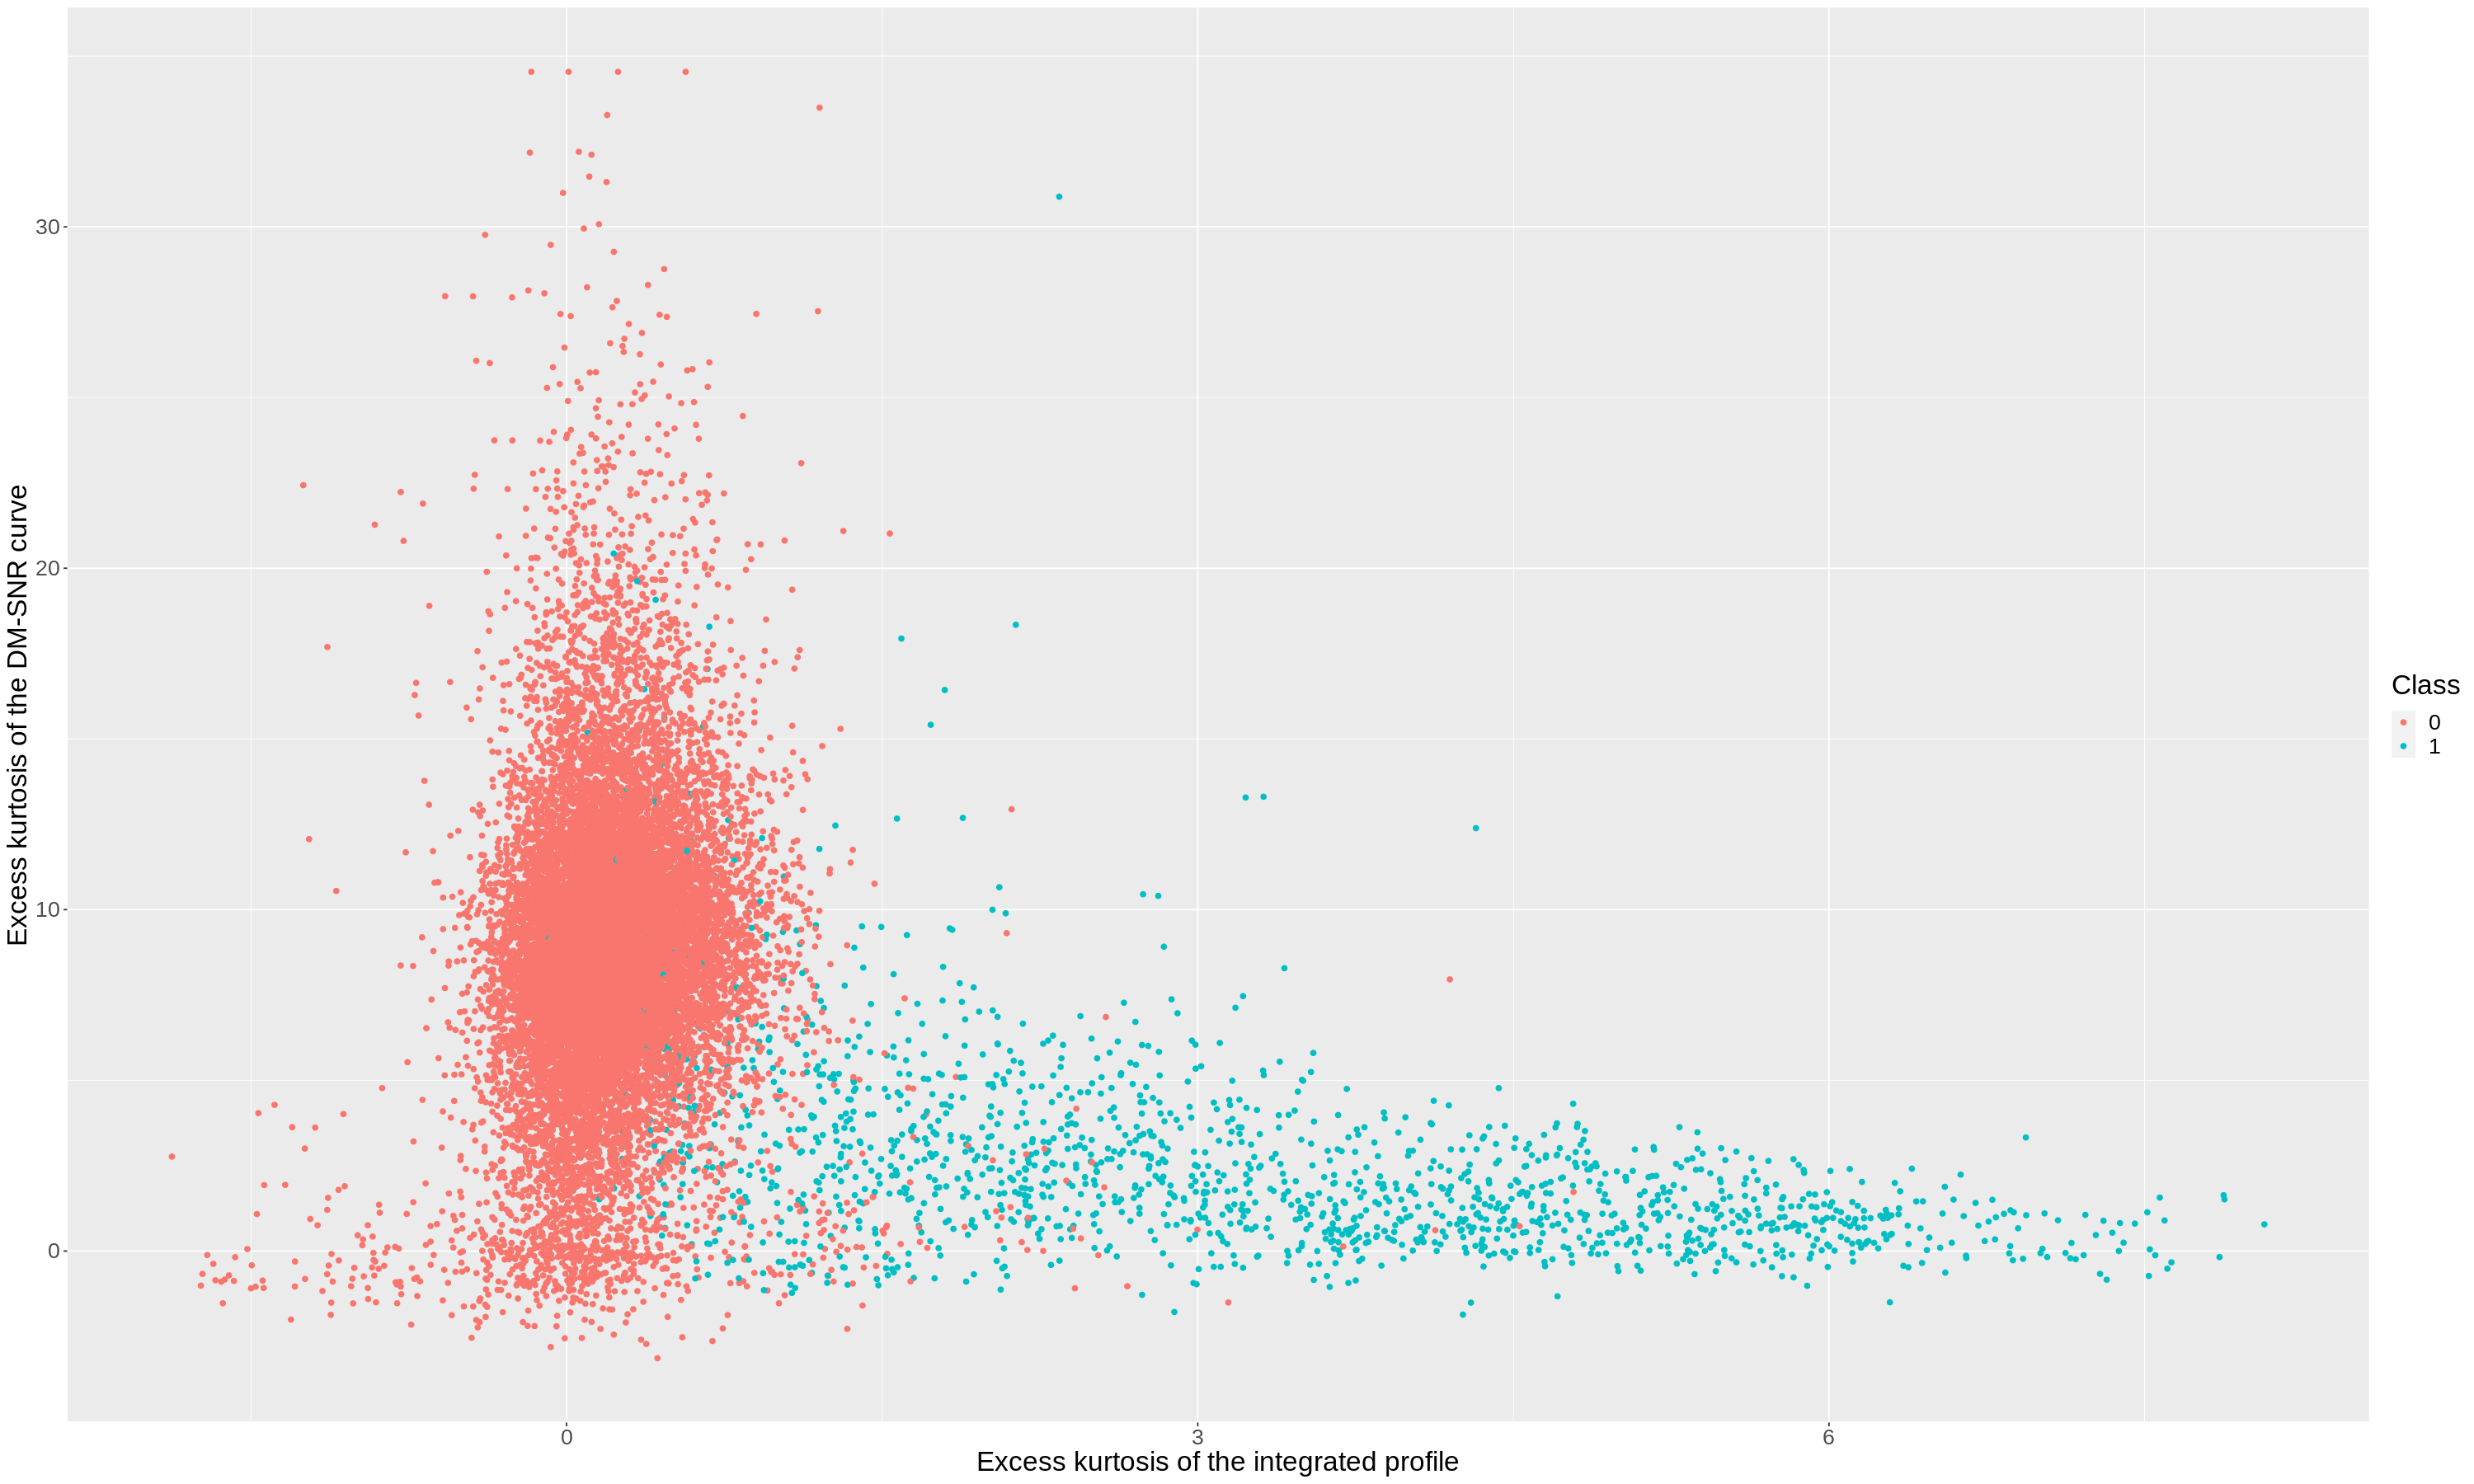

In [85]:
pulsar_excessk_plot <- pulsar %>%
        ggplot(aes(x = Excess.kurtosis.of.the.integrated.profile, y = Excess.kurtosis.of.the.DM.SNR.curve)) +
        geom_point(aes(color = target_class)) +
        labs(x = "Excess kurtosis of the integrated profile", y = "Excess kurtosis of the DM-SNR curve", color = "Class") +
        theme(text = element_text(size = 20))
pulsar_excessk_plot

Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 7603 rows containing missing values (geom_point).”


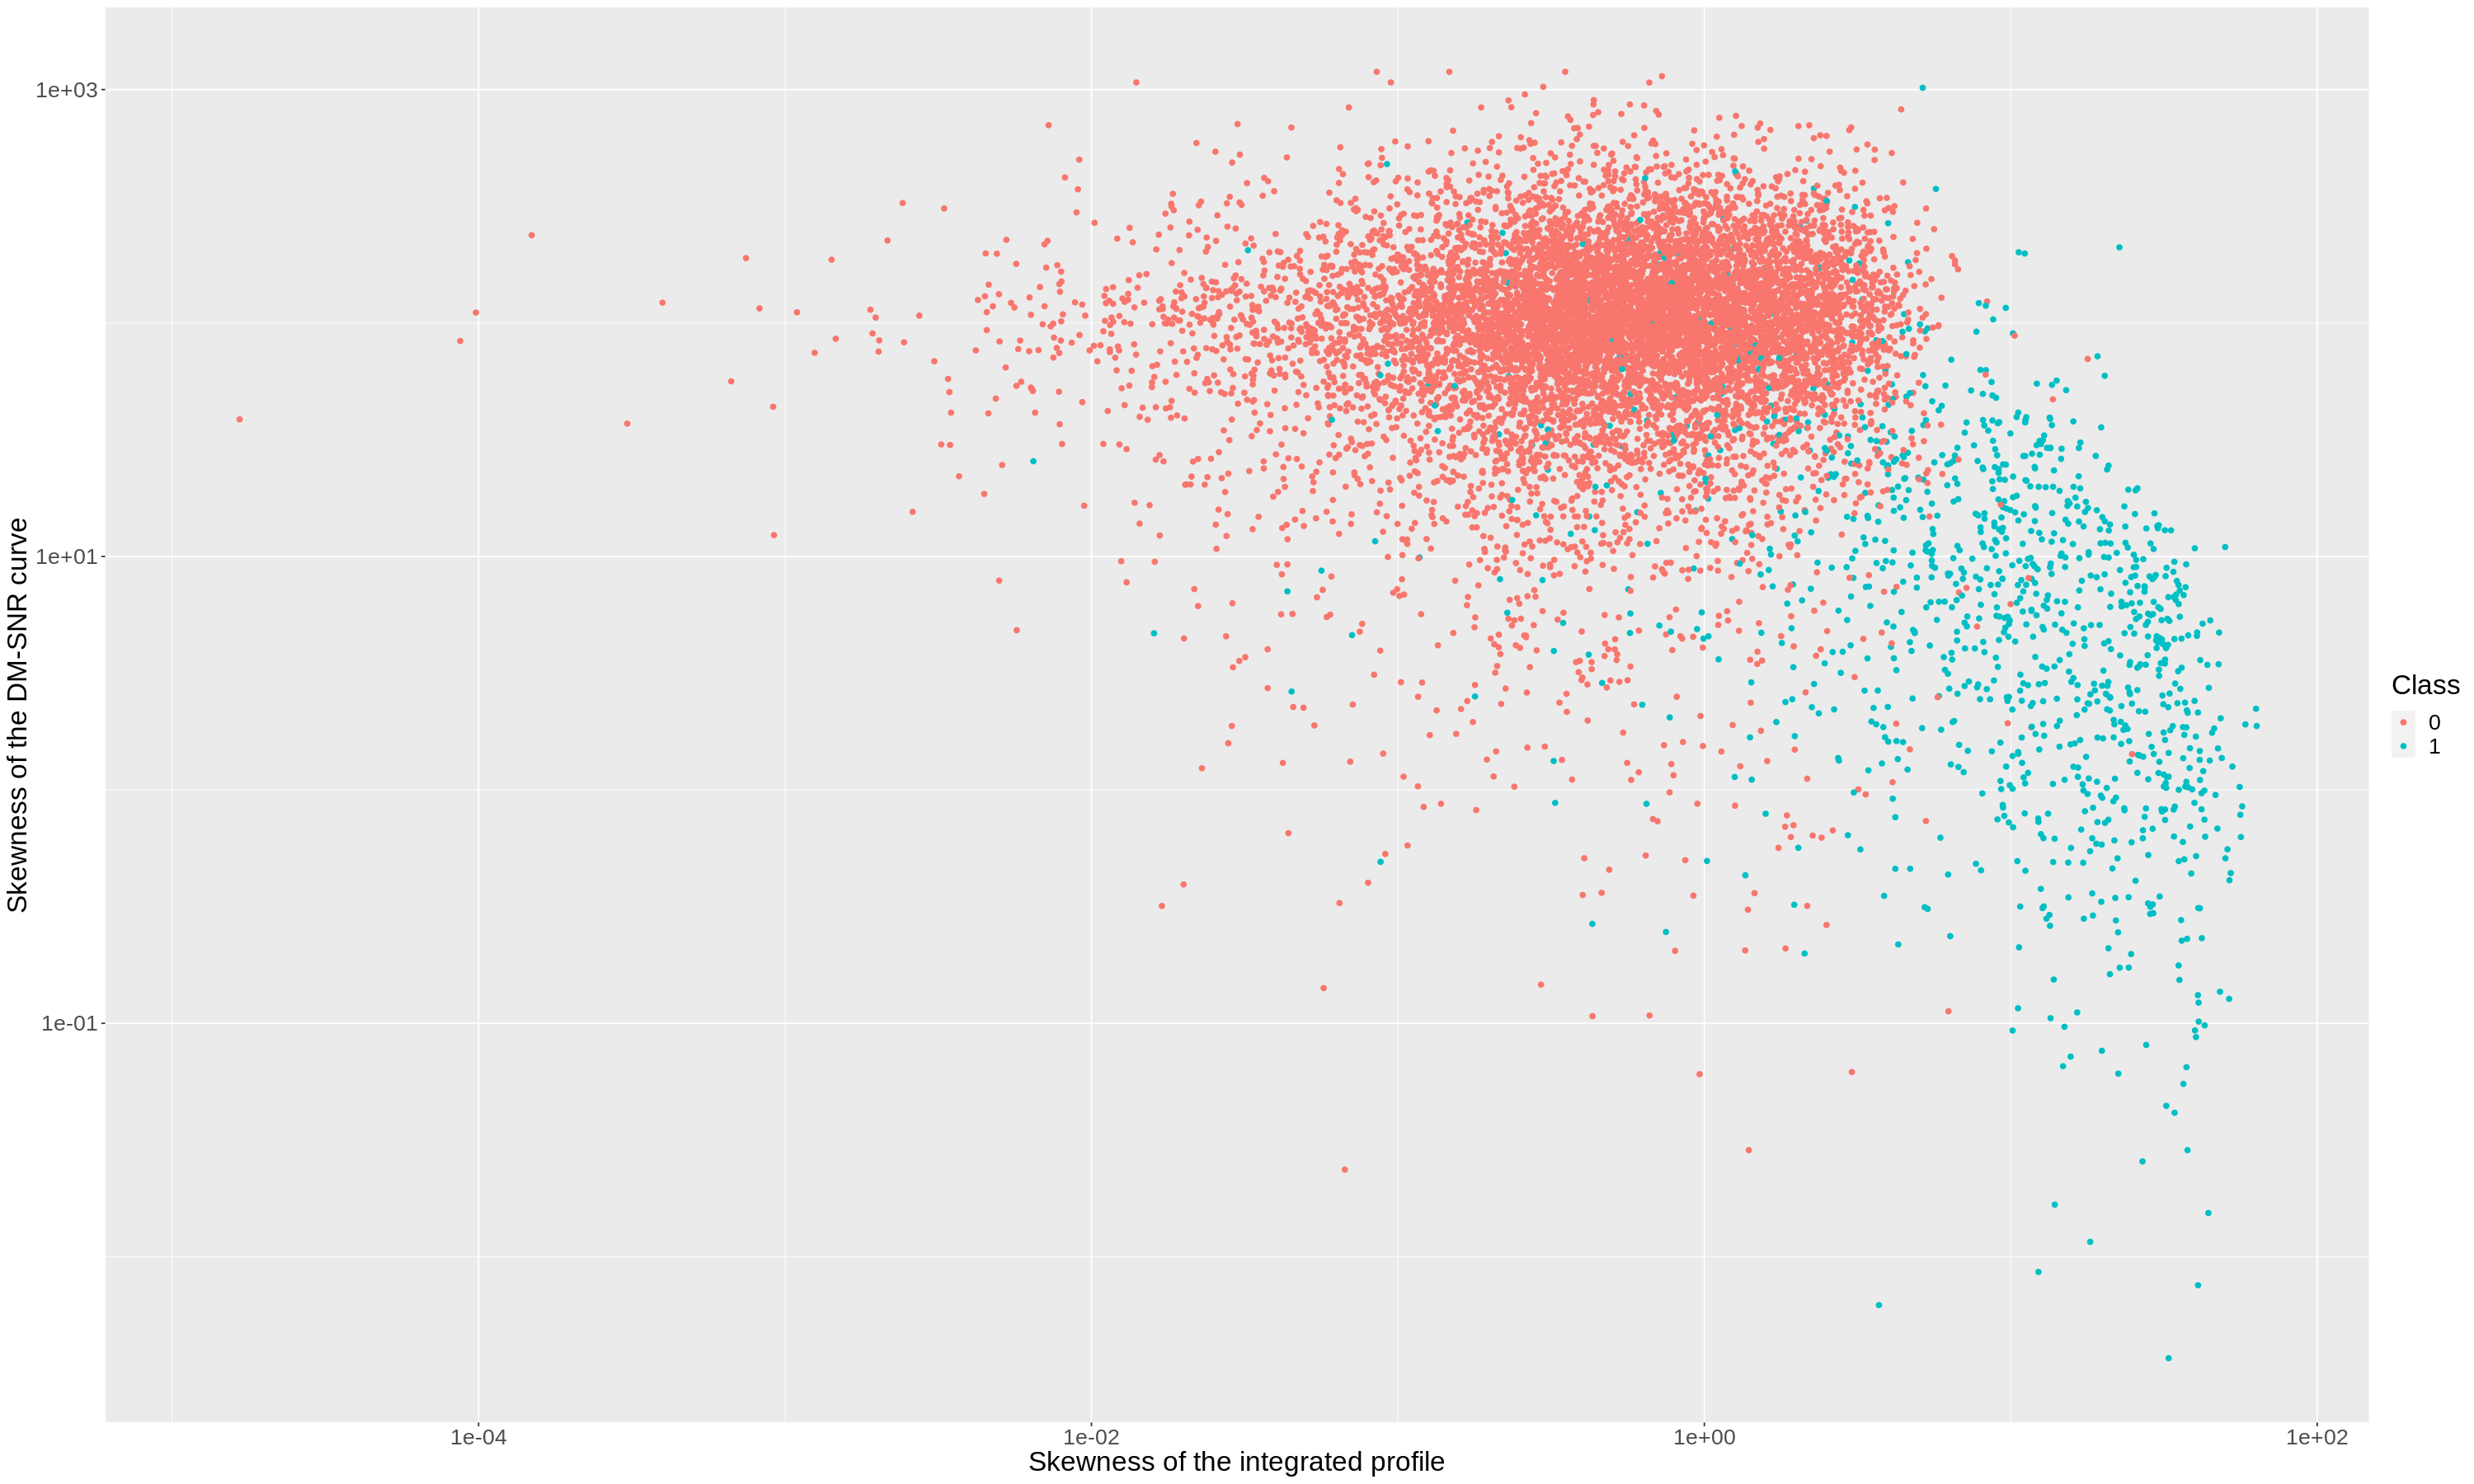

In [86]:
pulsar_skewness_plot <- pulsar %>%
        ggplot(aes(x = Skewness.of.the.integrated.profile, y = Skewness.of.the.DM.SNR.curve)) +
        geom_point(aes(color = target_class)) +
        labs(x = "Skewness of the integrated profile", y = "Skewness of the DM-SNR curve", color = "Class") +
        theme(text = element_text(size = 20)) +
        scale_x_log10() +
        scale_y_log10()
pulsar_skewness_plot

`summarise()` ungrouping output (override with `.groups` argument)



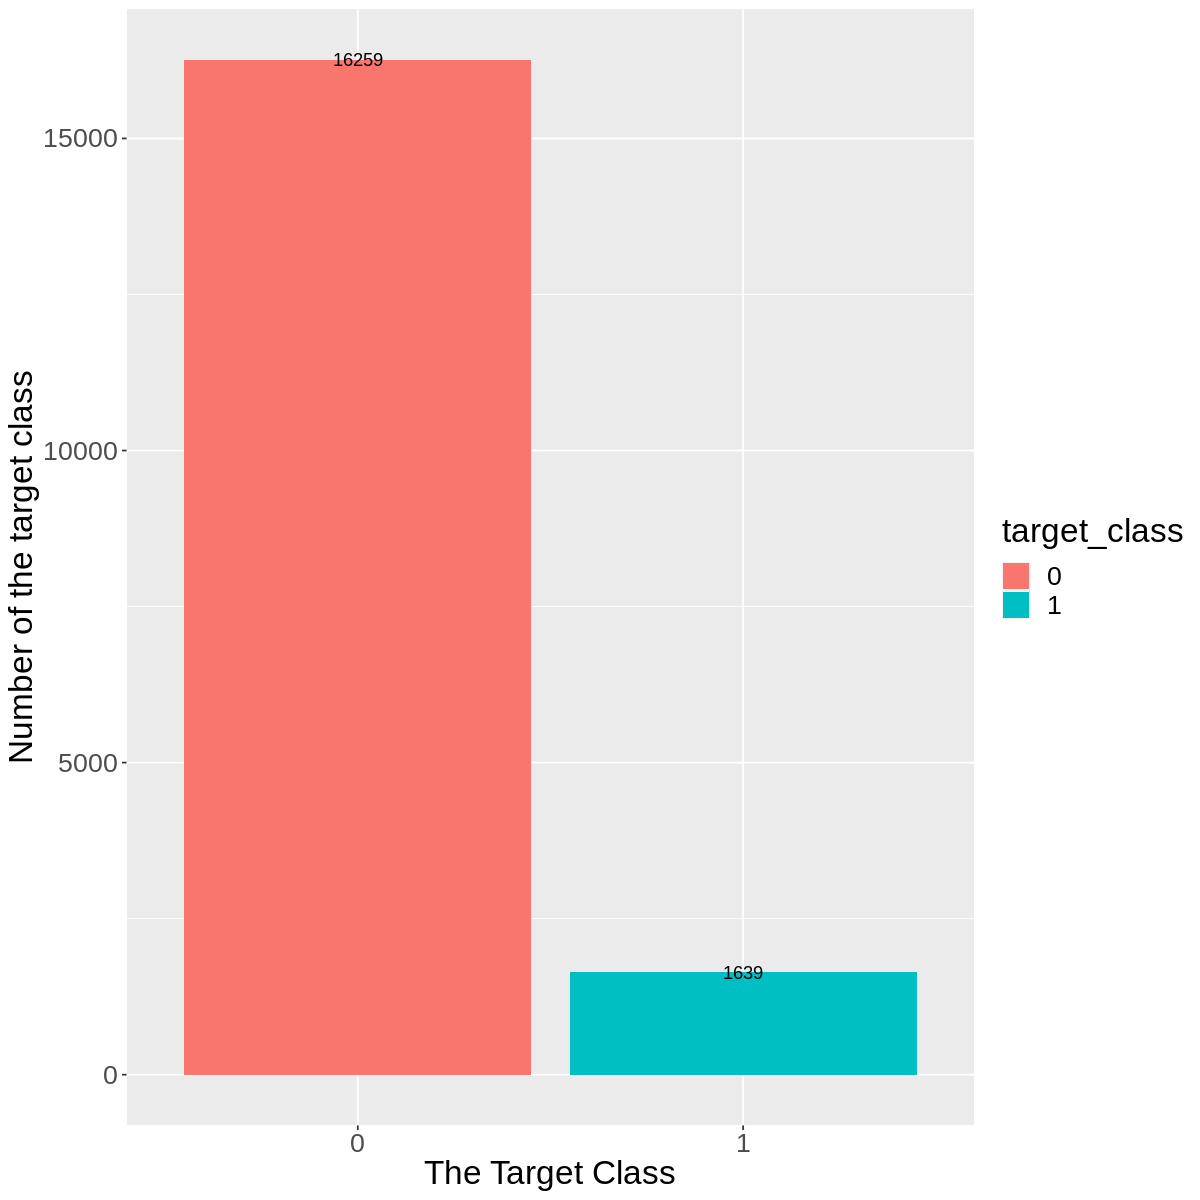

In [87]:
options(repr.plot.width = 10, repr.plot.height = 10) 
pulsar_number_plot <- pulsar %>%
        group_by(target_class)%>%
        summarise(n=n()) %>%
        ggplot(aes(x = target_class, y = n, fill=target_class)) +
        geom_bar(stat="identity") +
        labs(x = "The Target Class", y = "Number of the target class", color ="Target Class") +
        geom_text(aes(label=n))+
        theme(text = element_text(size = 20))

pulsar_number_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 10 rows containing missing values (geom_bar).”


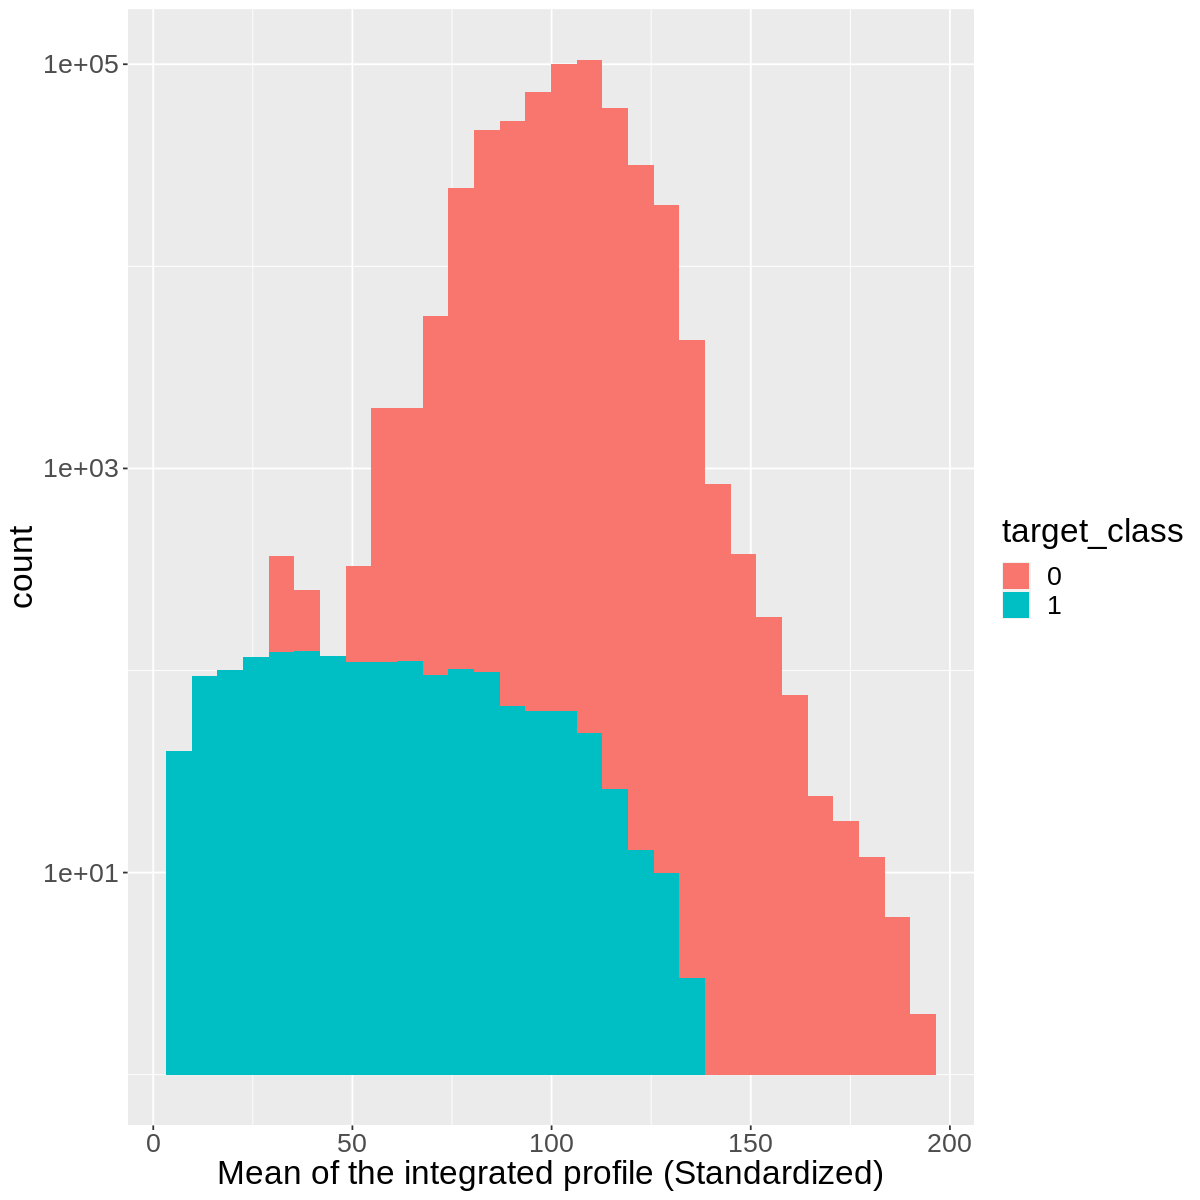

In [88]:
pulsar_mean_IP <- pulsar %>%
        ggplot(aes(x = Mean.of.the.integrated.profile, fill = target_class)) +
        geom_histogram() +
        labs(x = "Mean of the integrated profile (Standardized)") +
        theme(text = element_text(size = 20)) +
        scale_y_log10()
pulsar_mean_IP
#Y

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 10 rows containing missing values (geom_bar).”


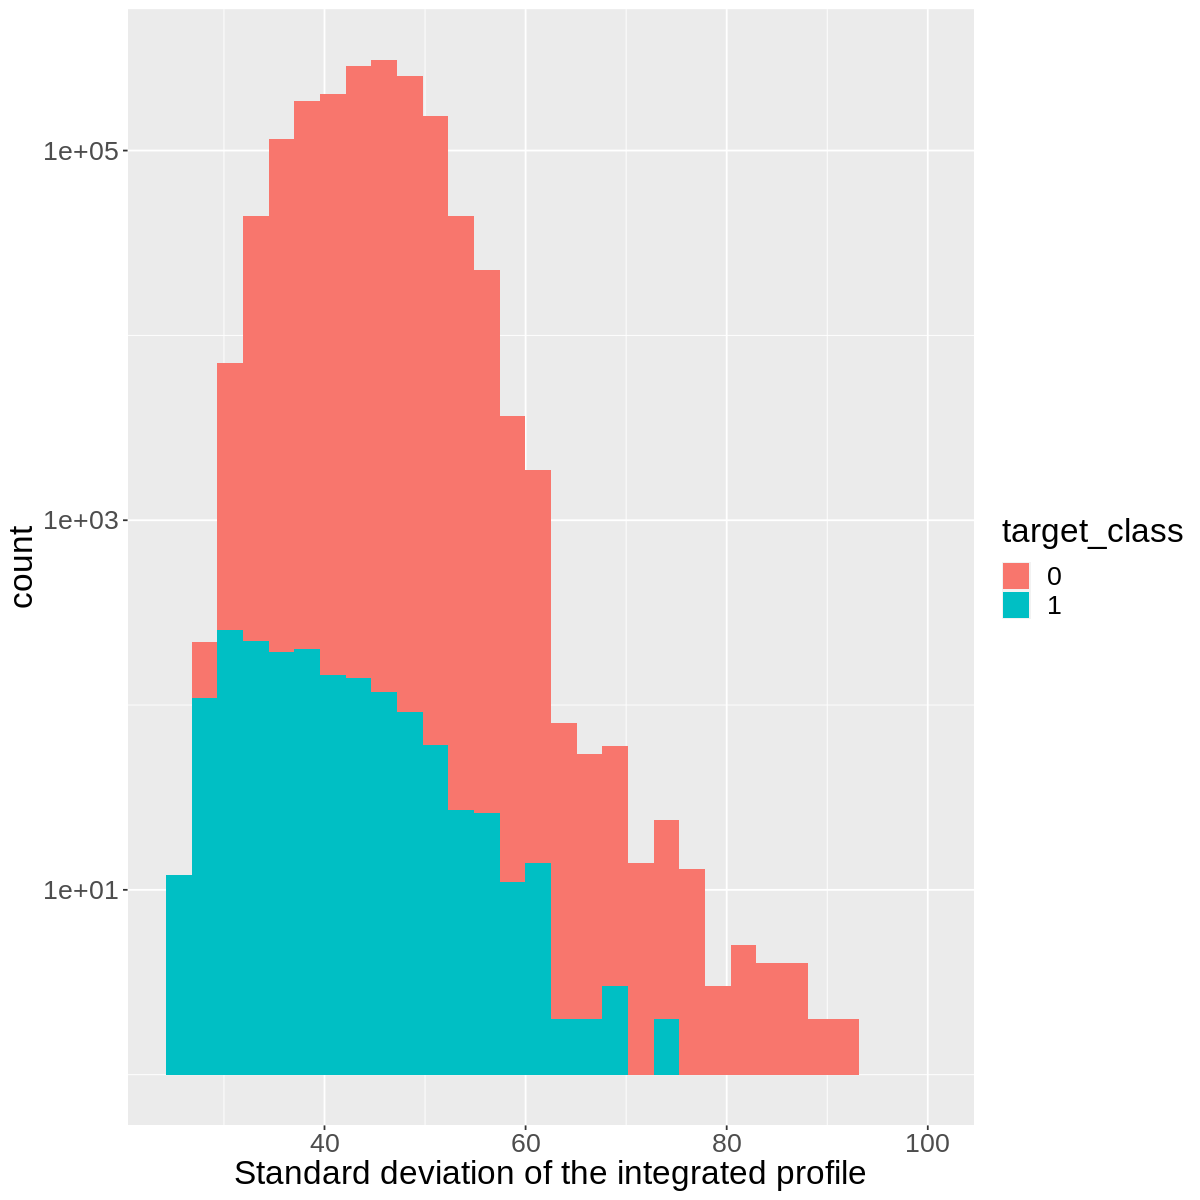

In [89]:
pulsar_SD_IP <- pulsar %>%
        ggplot(aes(x = Standard.deviation.of.the.integrated.profile, fill = target_class)) +
        geom_histogram() +
        labs(x = "Standard deviation of the integrated profile") +
        theme(text = element_text(size = 20))+
        scale_y_log10()
pulsar_SD_IP
#N

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 16 rows containing missing values (geom_bar).”


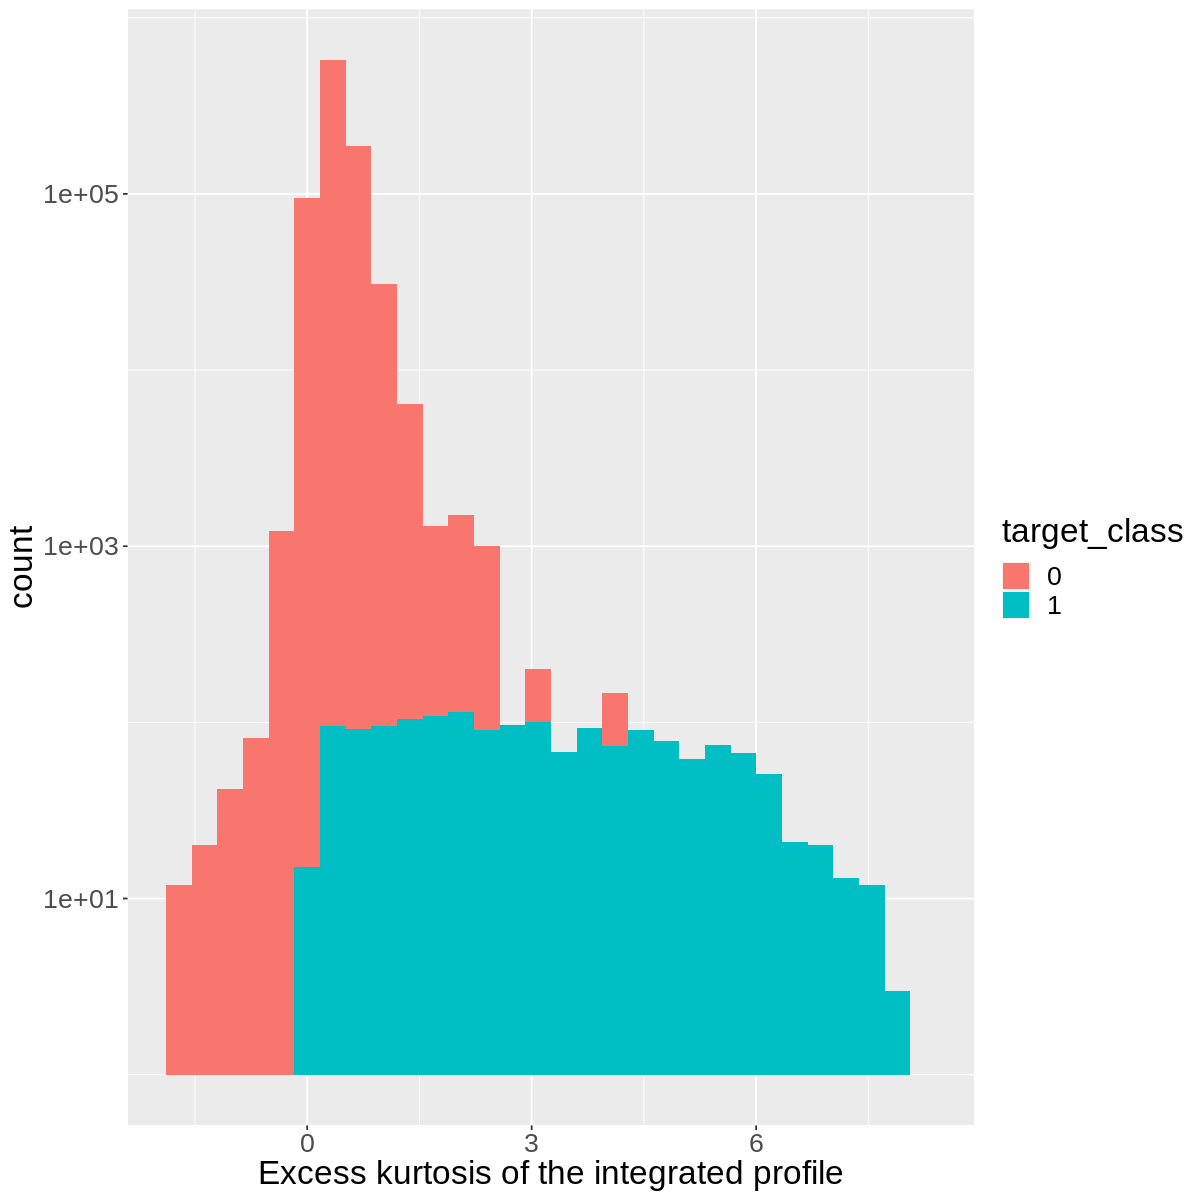

In [90]:
pulsar_EK_IP <- pulsar %>%
        ggplot(aes(x = Excess.kurtosis.of.the.integrated.profile, fill = target_class)) +
        geom_histogram() +
        labs(x = "Excess kurtosis of the integrated profile") +
        theme(text = element_text(size = 20)) +
        scale_y_log10()
pulsar_EK_IP
#Y

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 21 rows containing missing values (geom_bar).”


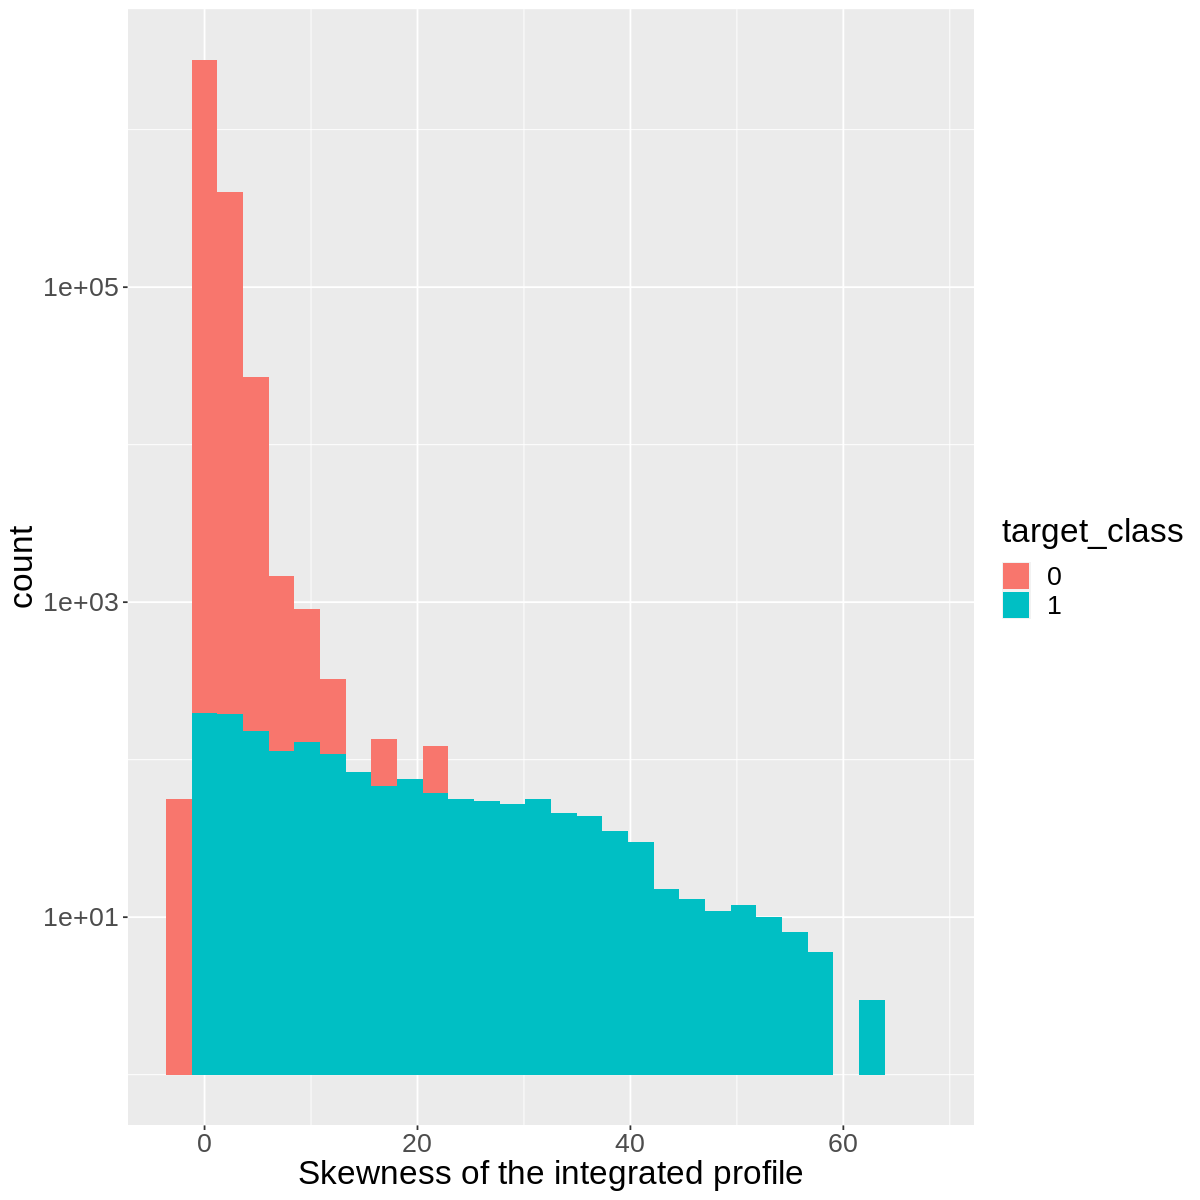

In [91]:
pulsar_skewness_IP <- pulsar %>%
        ggplot(aes(x = Skewness.of.the.integrated.profile, fill = target_class)) +
        geom_histogram() +
        labs(x = "Skewness of the integrated profile") +
        theme(text = element_text(size = 20)) +
        scale_y_log10()
pulsar_skewness_IP
#Y

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 4 rows containing missing values (geom_bar).”


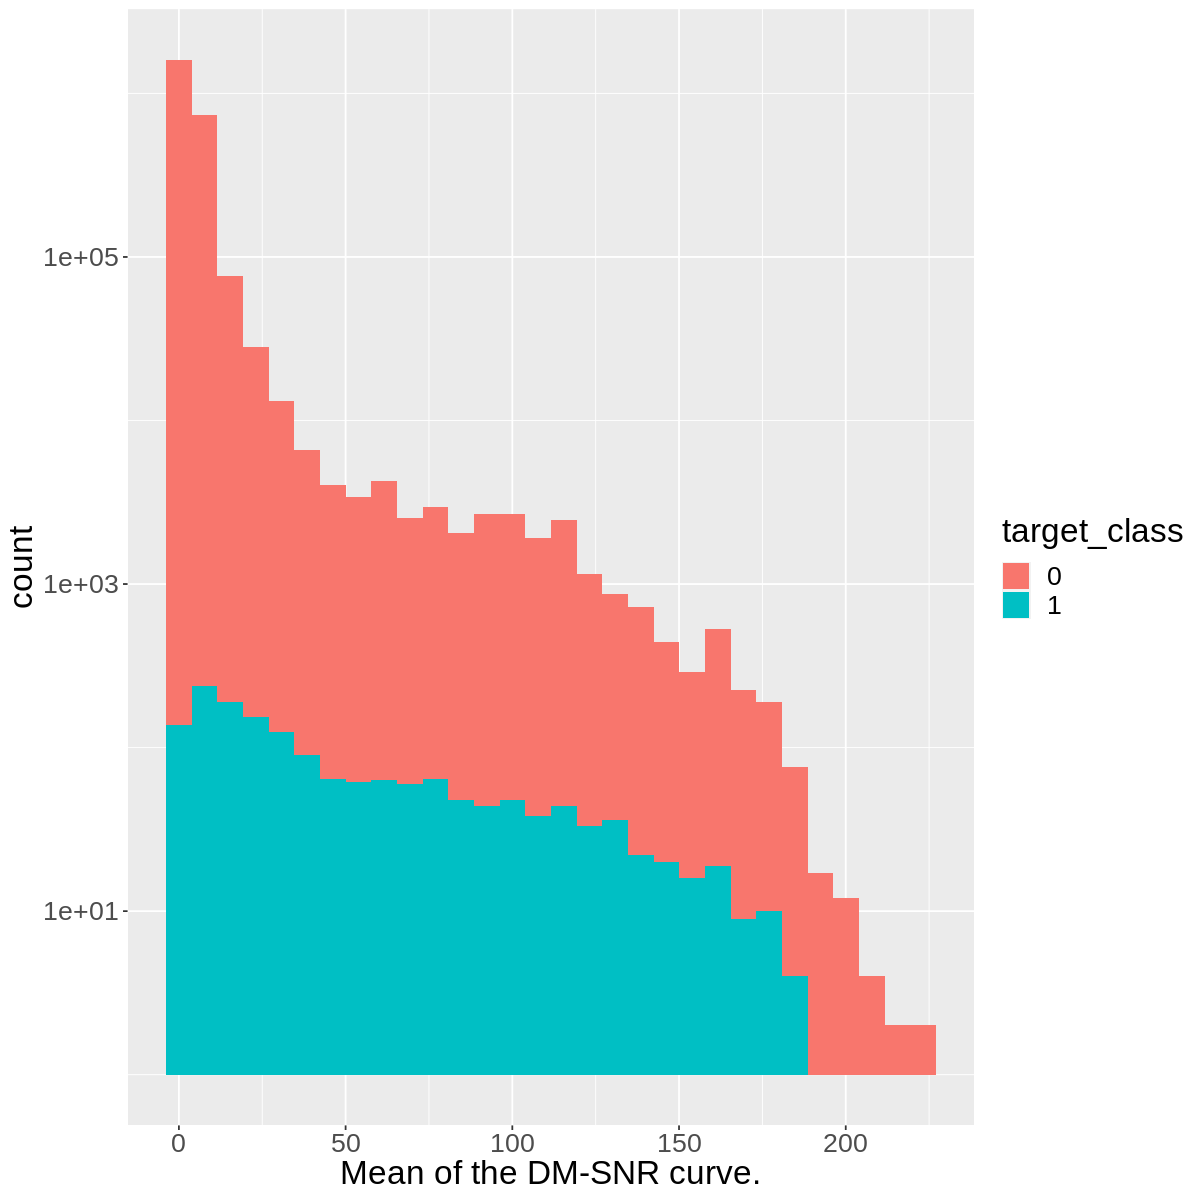

In [92]:
pulsar_mean_DM <- pulsar %>%
        ggplot(aes(x = Mean.of.the.DM.SNR.curve, fill = target_class)) +
        geom_histogram() +
        labs(x = "Mean of the DM-SNR curve.") +
        theme(text = element_text(size = 20)) +
        scale_y_log10()
pulsar_mean_DM
#N

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



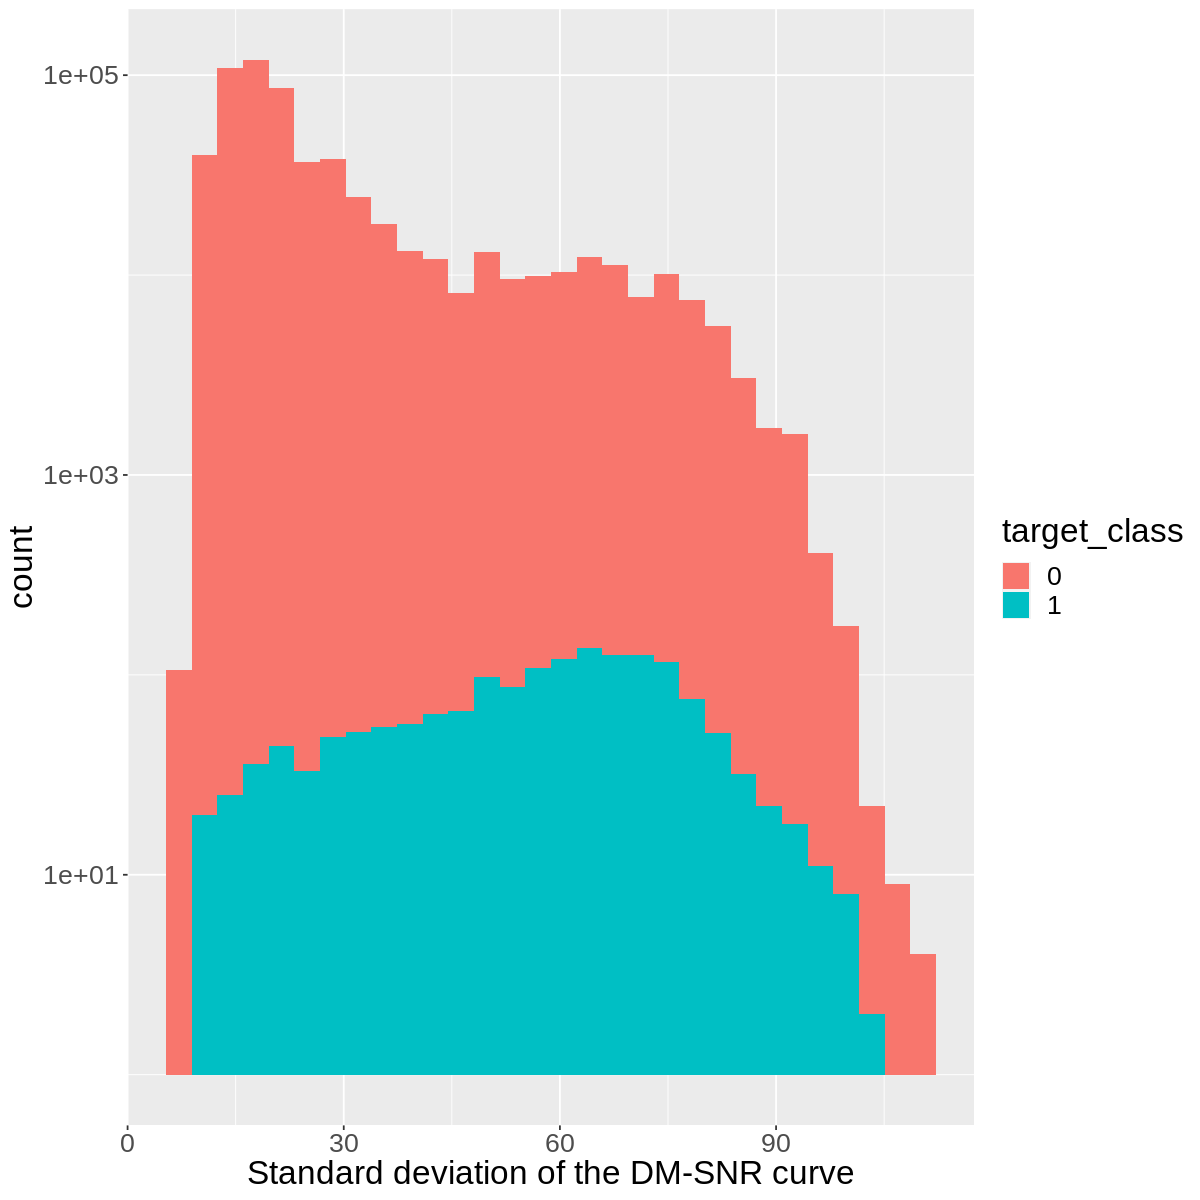

In [93]:
pulsar_SD_DM <- pulsar %>%
        ggplot(aes(x = Standard.deviation.of.the.DM.SNR.curve, fill = target_class)) +
        geom_histogram() +
        labs(x = "Standard deviation of the DM-SNR curve") +
        theme(text = element_text(size = 20)) +
        scale_y_log10()
pulsar_SD_DM
#N

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 11 rows containing missing values (geom_bar).”


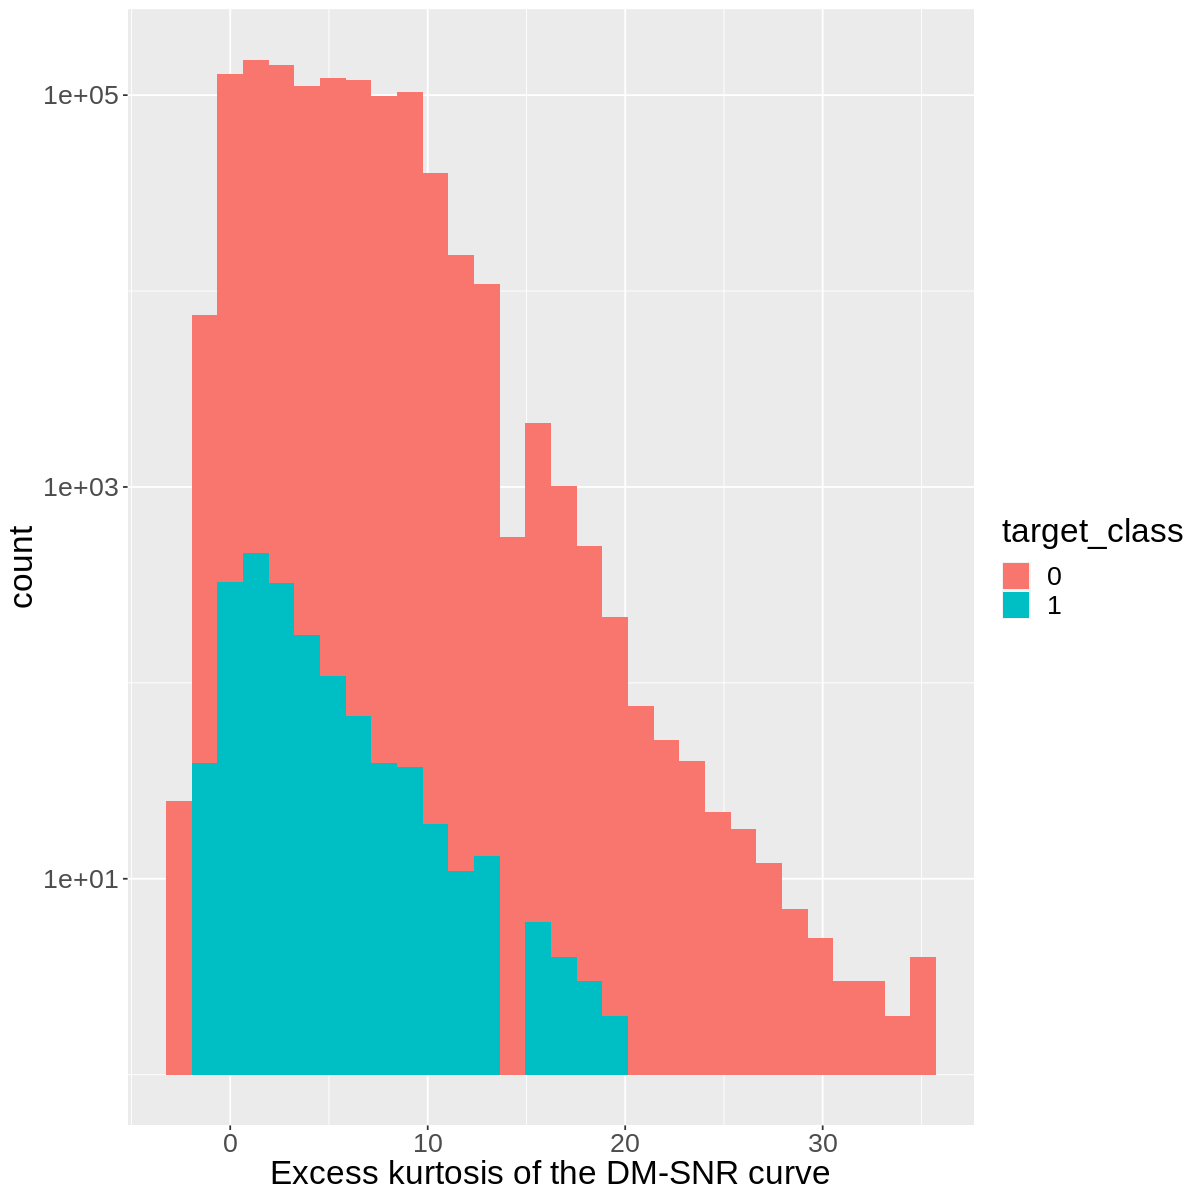

In [94]:
pulsar_EK_DM <- pulsar %>%
        ggplot(aes(x = Excess.kurtosis.of.the.DM.SNR.curve, fill = target_class)) +
        geom_histogram() +
        labs(x = "Excess kurtosis of the DM-SNR curve") +
        theme(text = element_text(size = 20)) +
        scale_y_log10()

pulsar_EK_DM
#N

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 16 rows containing missing values (geom_bar).”


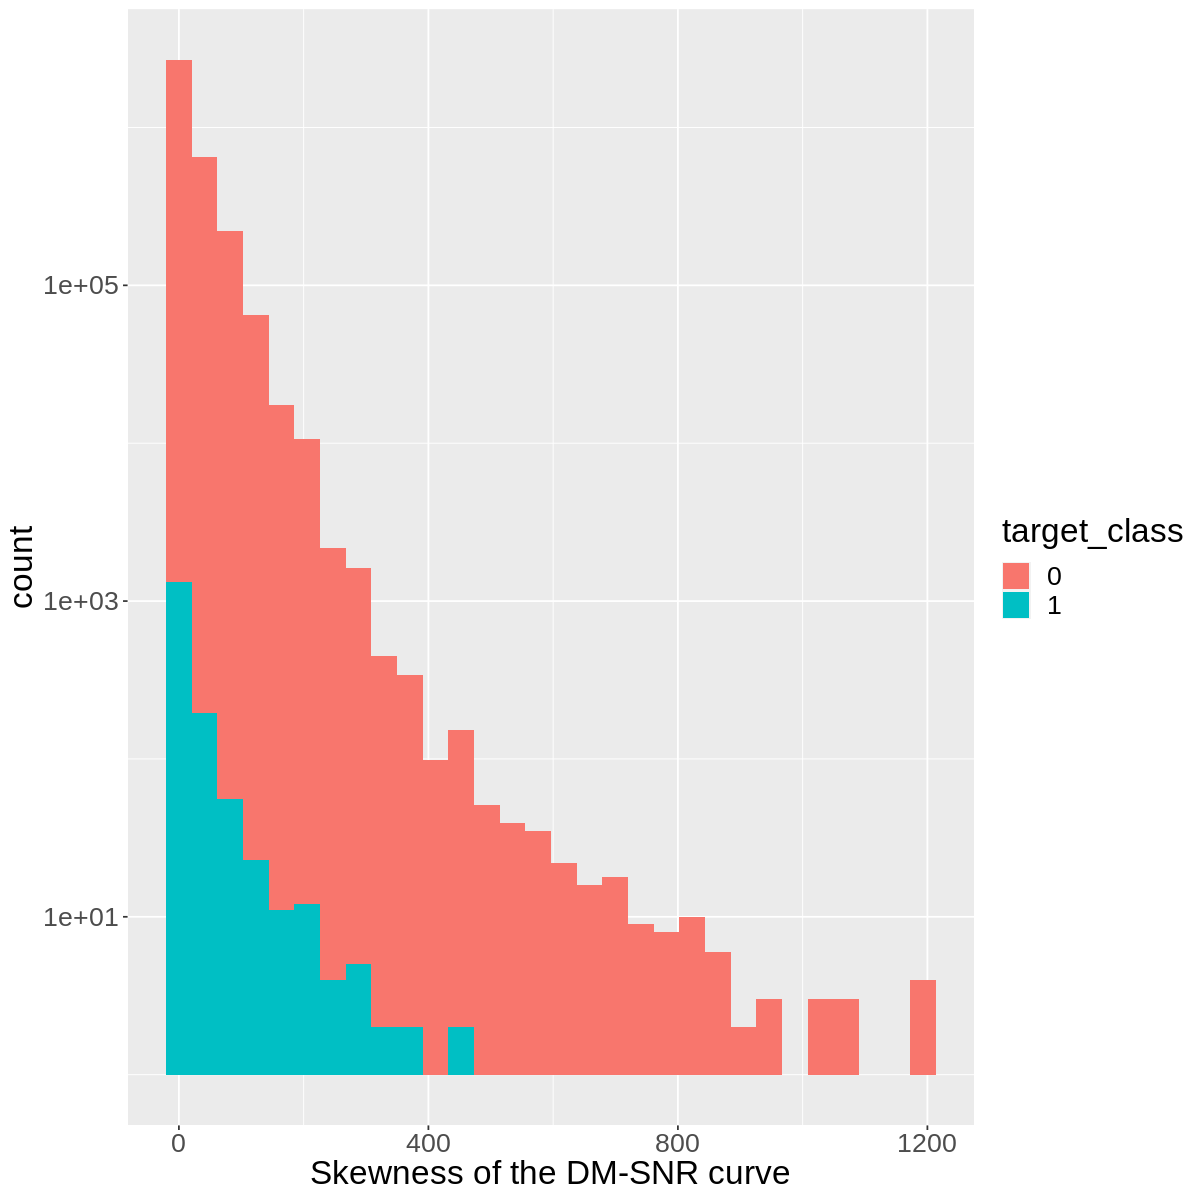

In [95]:
pulsar_skewness_DM <- pulsar %>%
        ggplot(aes(x = Skewness.of.the.DM.SNR.curve, fill = target_class)) +
        geom_histogram() +
        labs(x = "Skewness of the DM-SNR curve") +
        theme(text = element_text(size = 20))+
        scale_y_log10()
pulsar_skewness_DM
#N

In [96]:
set.seed(2021)

pulsar_split <- initial_split(pulsar, prop = 0.75, strata = target_class)  
pulsar_train <- training(pulsar_split)   
pulsar_test <- testing(pulsar_split)

glimpse(pulsar_train)

Rows: 13,424
Columns: 9
$ Mean.of.the.integrated.profile               <dbl> 140.56250, 102.50781, 10…
$ Standard.deviation.of.the.integrated.profile <dbl> 55.68378, 58.88243, 39.3…
$ Excess.kurtosis.of.the.integrated.profile    <dbl> -0.23457141, 0.46531815,…
$ Skewness.of.the.integrated.profile           <dbl> -0.69964840, -0.51508791…
$ Mean.of.the.DM.SNR.curve                     <dbl> 3.1998328, 1.6772575, 3.…
$ Standard.deviation.of.the.DM.SNR.curve       <dbl> 19.110426, 14.860146, 21…
$ Excess.kurtosis.of.the.DM.SNR.curve          <dbl> 7.975532, 10.576487, 7.7…
$ Skewness.of.the.DM.SNR.curve                 <dbl> 74.24222, 127.39358, 63.…
$ target_class                                 <fct> 0, 0, 0, 0, 0, 0, 0, 0, …


In [97]:
scale_transformer <- preProcess(pulsar_train, method = c("center", "scale"))

sd_training_set <- predict(scale_transformer, pulsar_train)
sd_testing_set <- predict(scale_transformer, pulsar_test)

In [98]:
pulsar_table <- sd_training_set %>%
    mutate(na_count = apply(sd_training_set, 1, function(x) sum(is.na(x)))) %>%
                            group_by(target_class) %>%
                            summarize(n = n(), 
                                      percentage = n() / nrow(pulsar_train) * 100,
                                      na_count = sum(na_count))
    cat("Table 1: Summary of Data Set")
    pulsar_table

`summarise()` ungrouping output (override with `.groups` argument)



Table 1: Summary of Data Set

target_class n     percentage na_count
1 0            12179 90.725566  0       
2 1             1245  9.274434  0

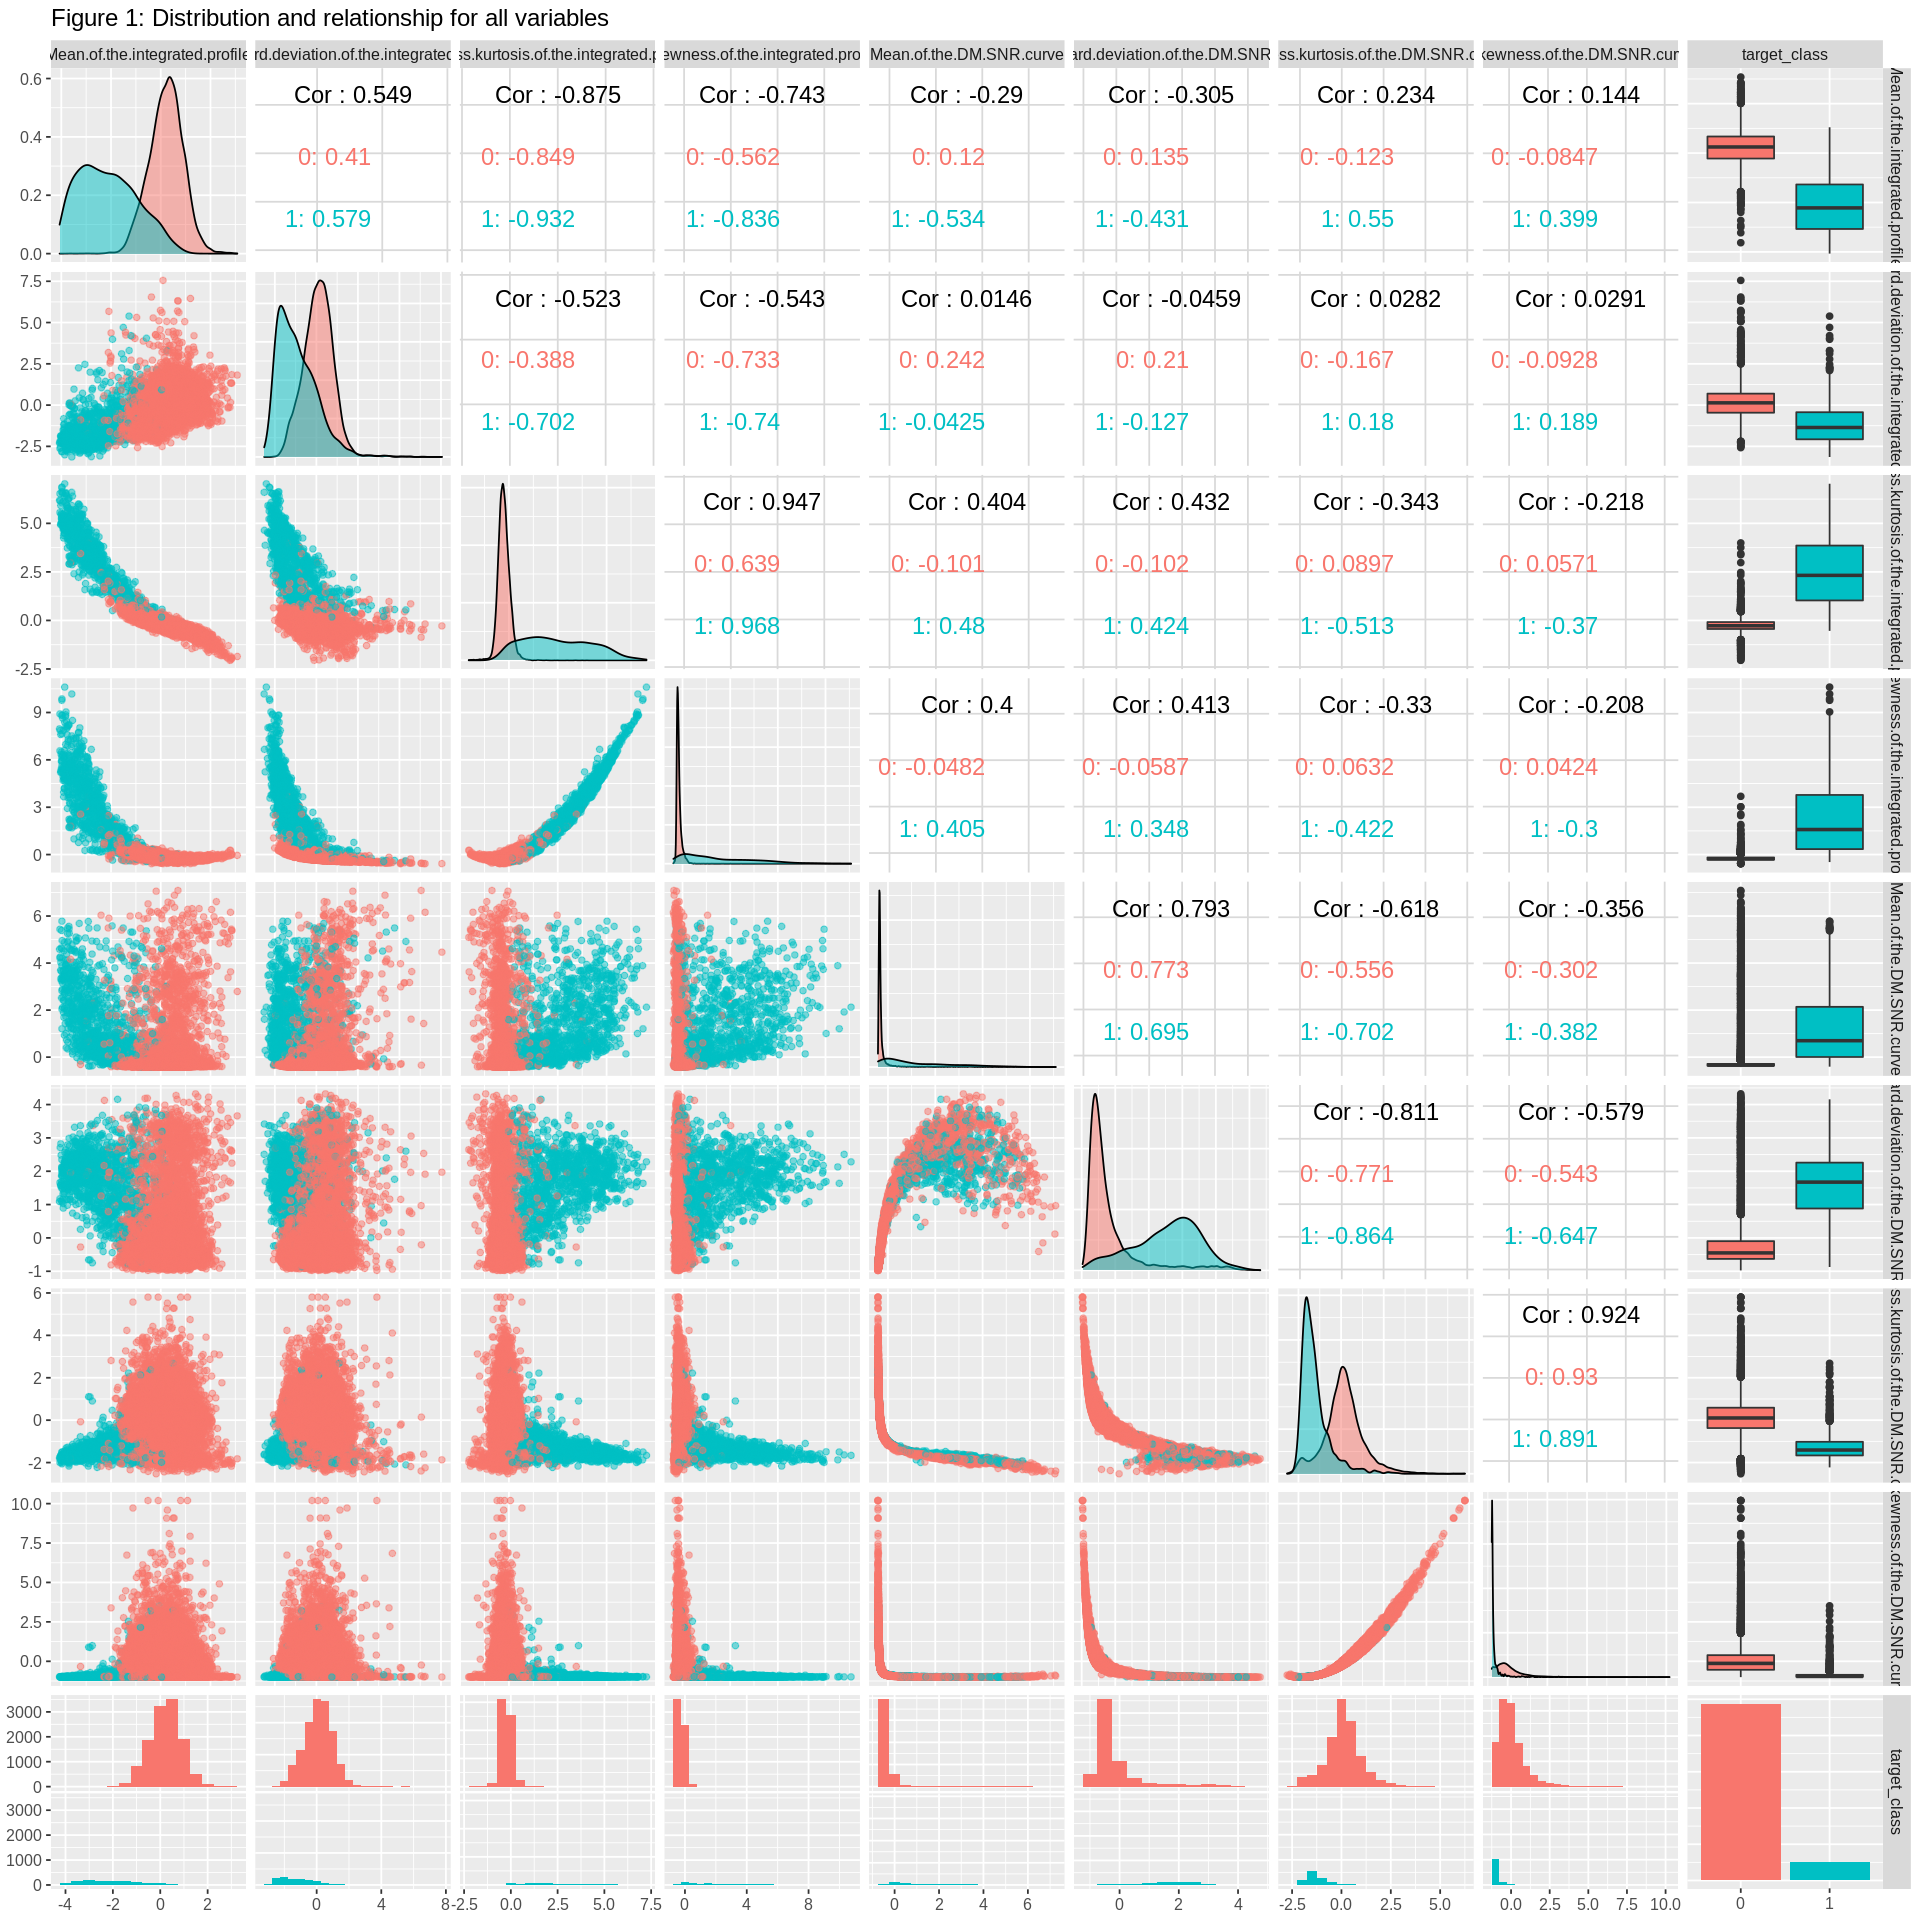

In [99]:
options(repr.plot.width = 16, repr.plot.height = 16)
pulsar_plot <- ggpairs(data = sd_training_set, mapping=ggplot2::aes(colour = target_class), 
    upper = list(continuous = wrap("cor", size = 5)),
    lower = list(continuous = wrap("points", alpha = 0.5), combo=(wrap("facethist", binwidth = 0.5))),
    diag = list(continuous = wrap("densityDiag", alpha = 0.5)),
    title = "Figure 1: Distribution and relationship for all variables") +
    theme(text = element_text(size=12))
pulsar_plot

To help distinguish predictors from our classification model, we extract the histogram plots below [Figure 1.1] to see the distribution of each variable and whether it can help us distinguish each class well. From these plots, we can see that the second, seventh, and eighth variables have a relatively similar shape of the distribution for each class. Moreover, we see that these three variables have relatively large overlapped areas between both classes from the diagonal plots [Figure 1.2]. Hence, we decided to opt-out standard deviation of the integrated profile, excess kurtosis of the DM-SNR curve, and skewness of the DM-SNR curve.

Besides, this ggpair graph gives us some intuition that the first and sixth predictors are relatively good predictors based on the distribution shape of each class in the histogram. Moreover, the third variable should be a good predictor because the histogram distribution shows that the distribution of each class is very different, and the density graph shows a relatively small overlapped area. Also, the fourth and fifth predictors are relatively good predictors based on small overlaps in the density graph. 

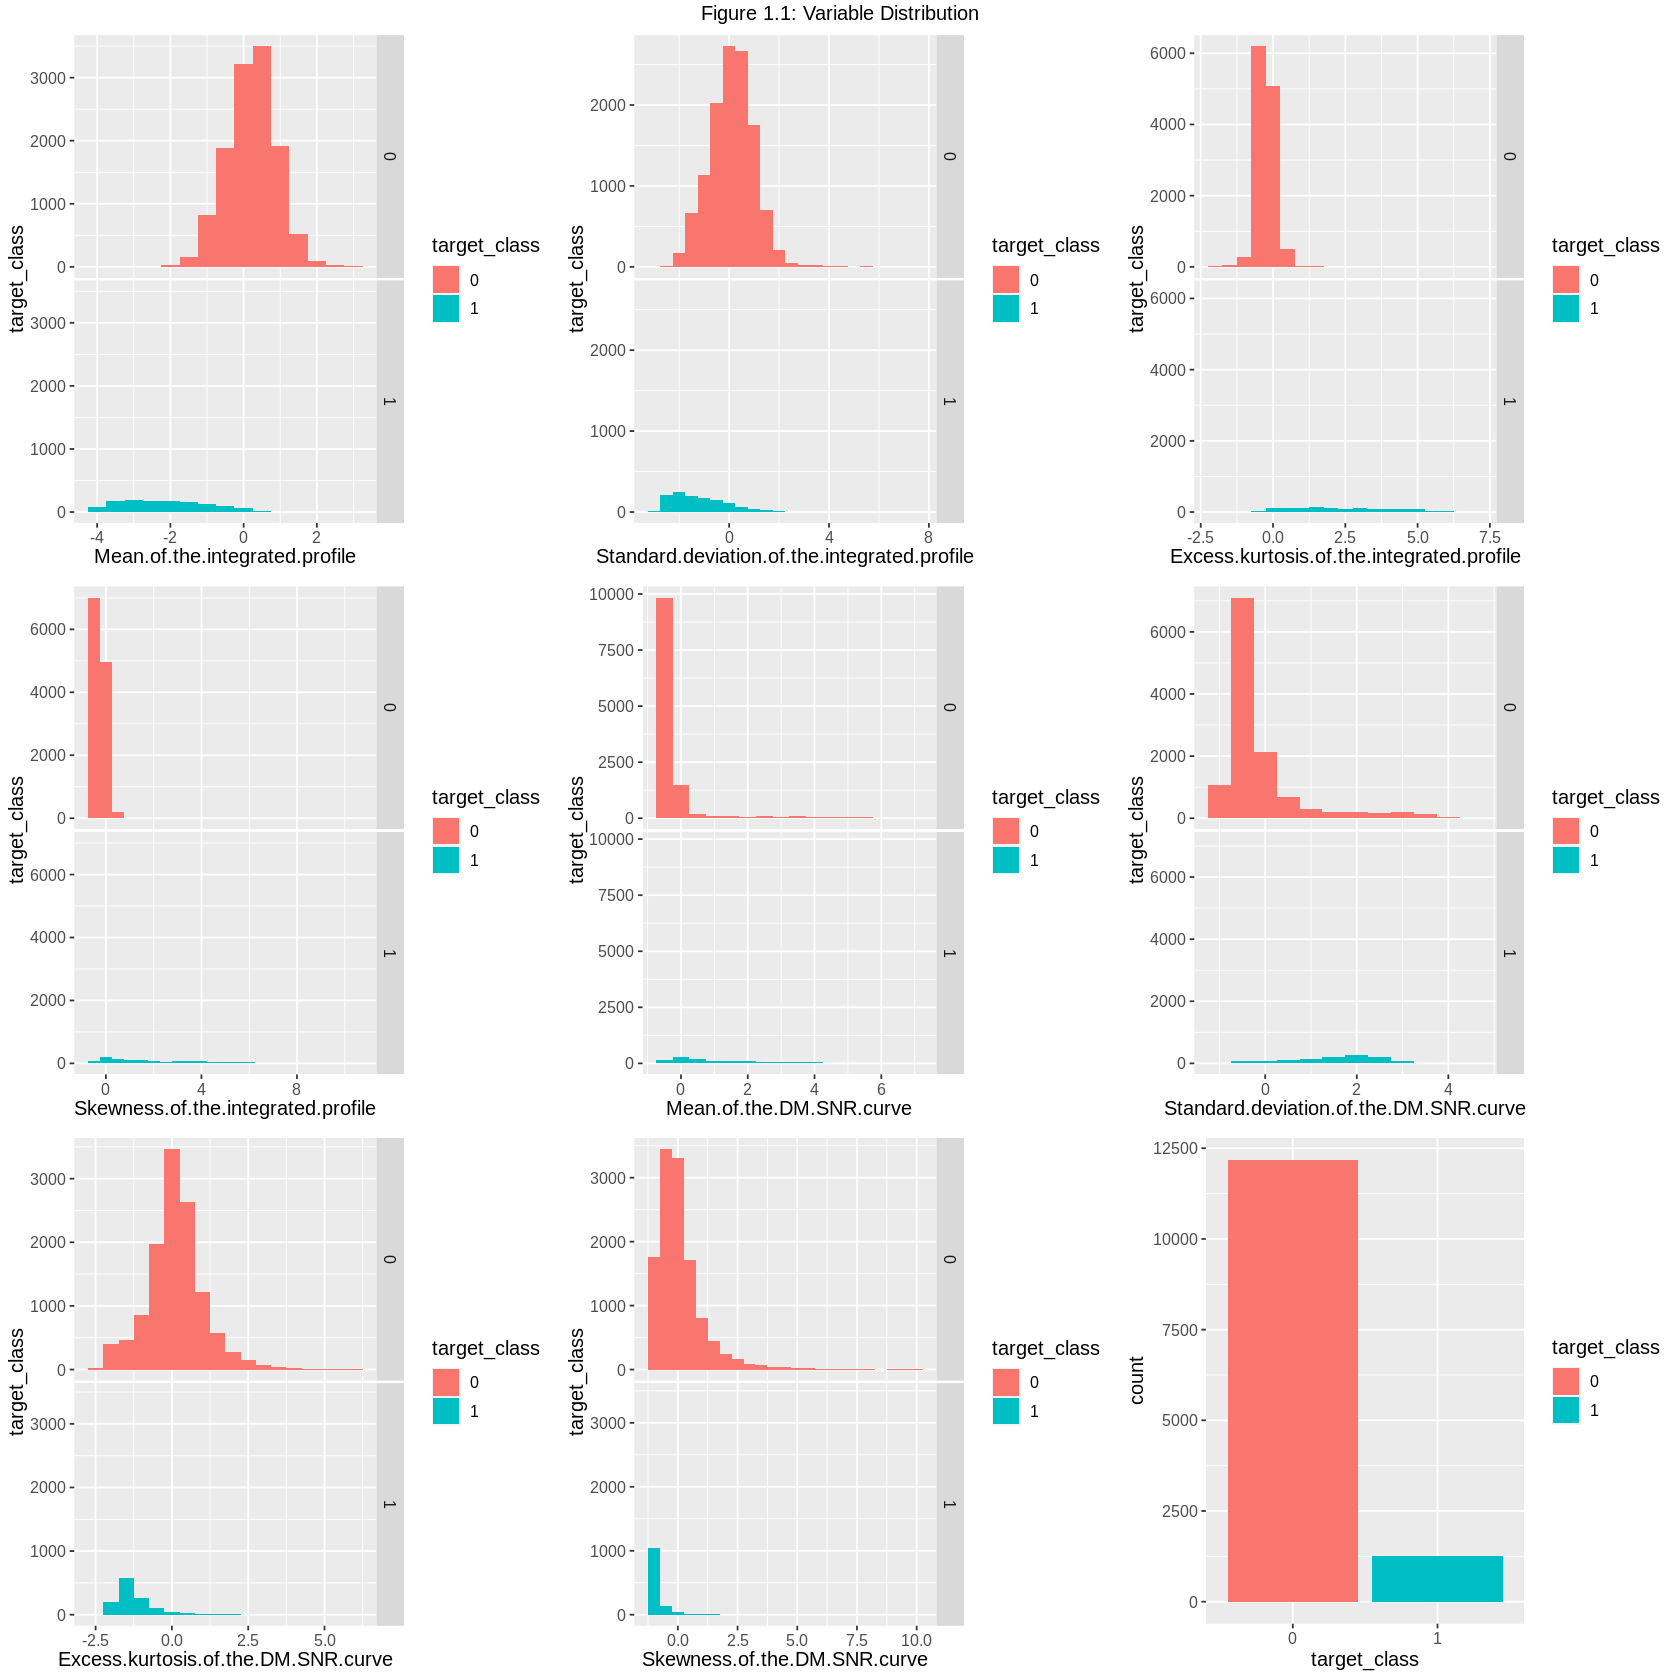

In [105]:
options(repr.plot.width = 14, repr.plot.height = 14)
grid.arrange(getPlot(pulsar_plot, 9,1), getPlot(pulsar_plot, 9,2), getPlot(pulsar_plot, 9,3),
             getPlot(pulsar_plot, 9,4), getPlot(pulsar_plot, 9,5), getPlot(pulsar_plot, 9,6),
             getPlot(pulsar_plot, 9,7), getPlot(pulsar_plot, 9,8), getPlot(pulsar_plot, 9,9), nrow = 3, top = "Figure 1.1: Variable Distribution")

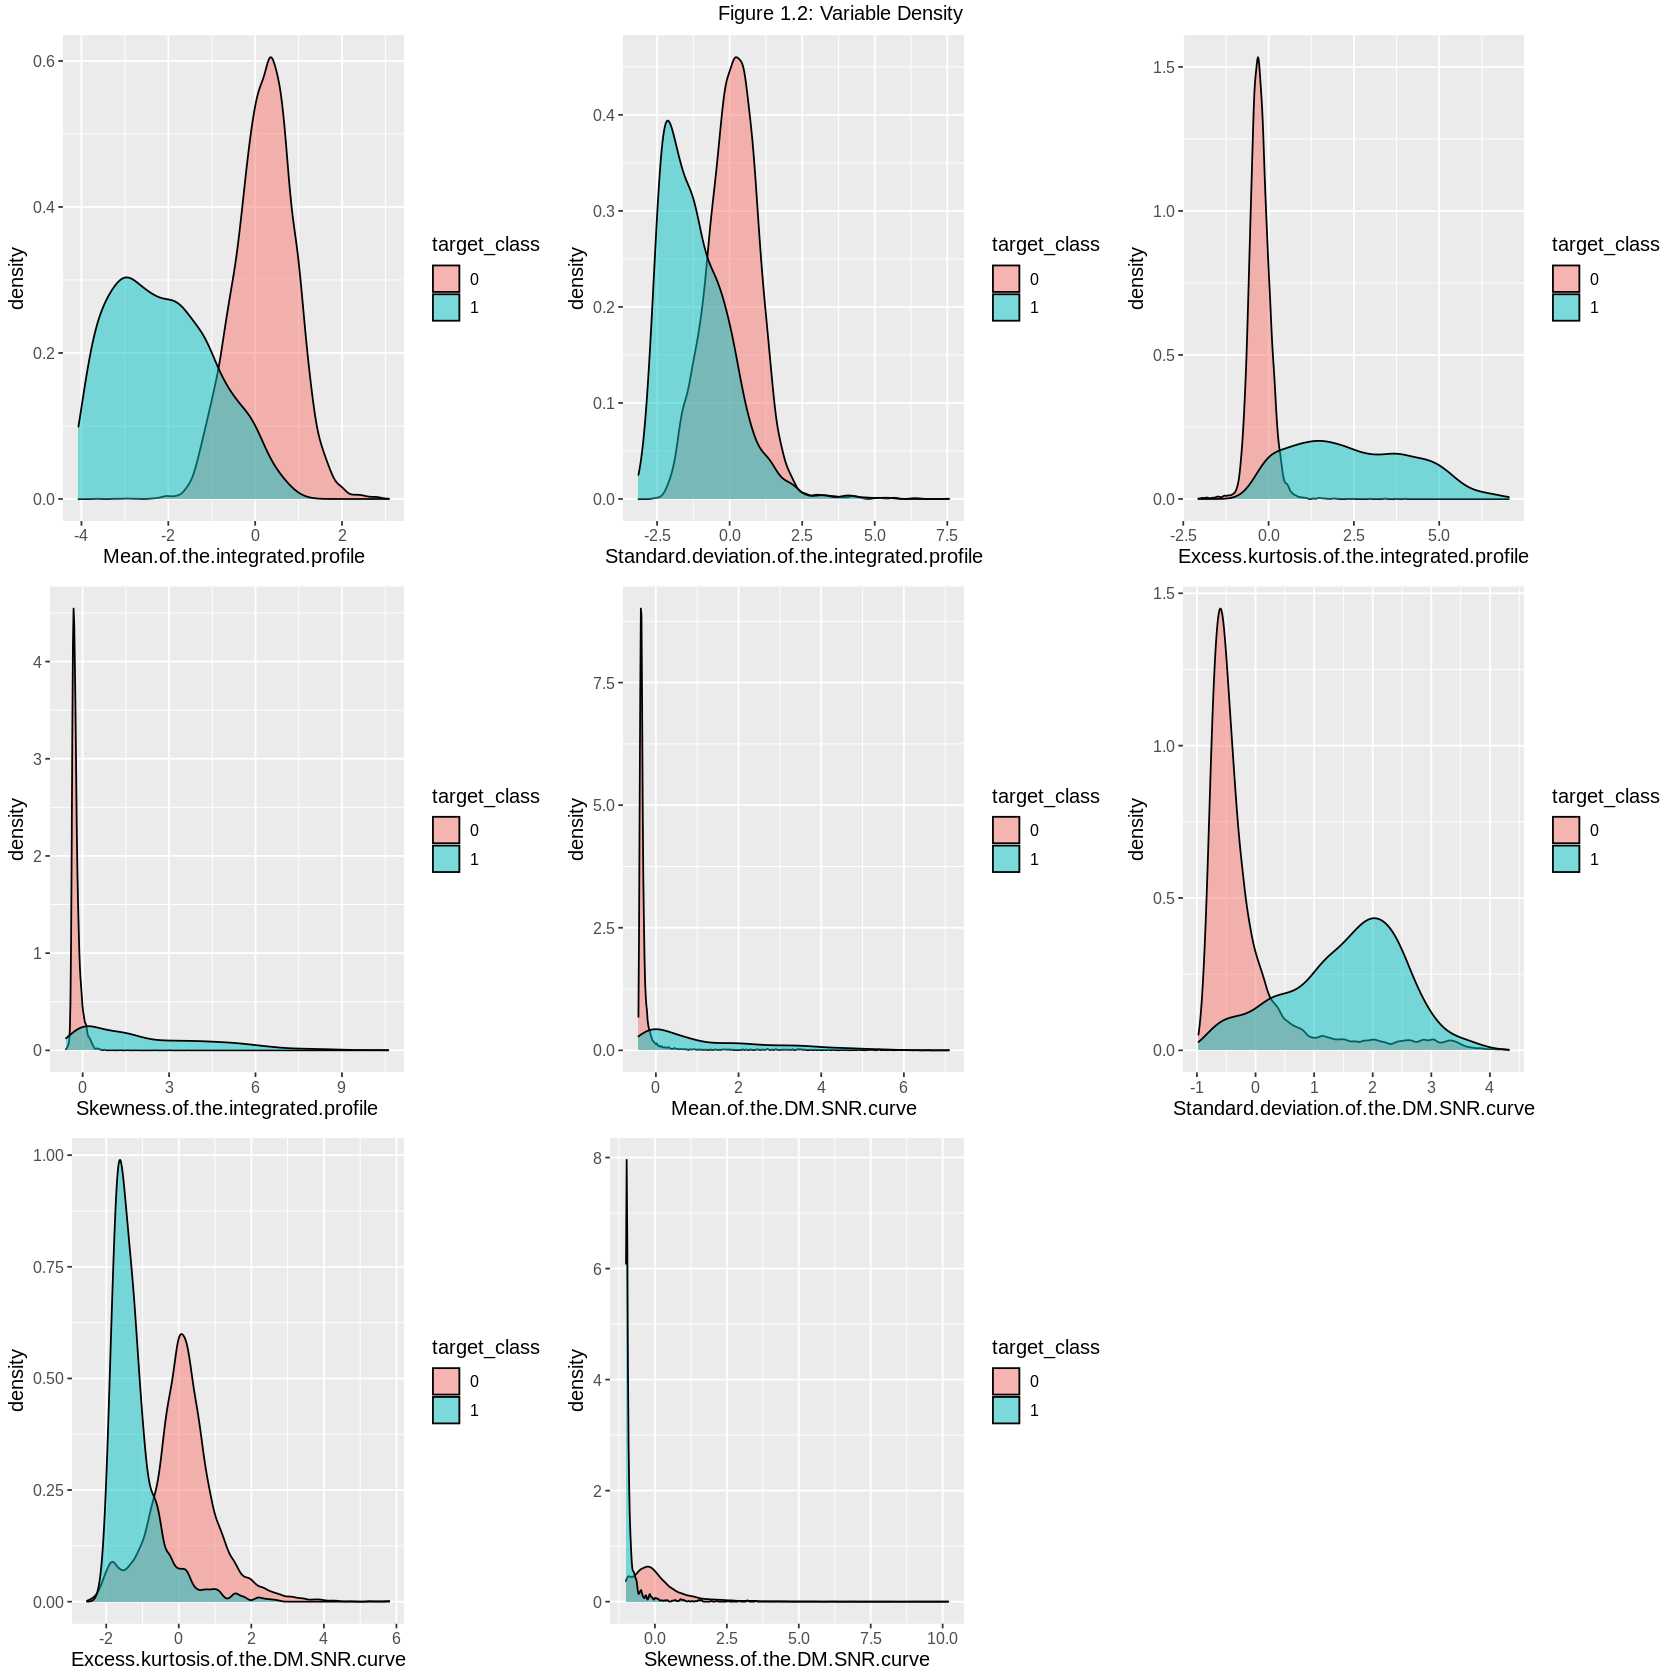

In [110]:
options(repr.plot.width = 14, repr.plot.height = 14)
grid.arrange(getPlot(pulsar_plot, 1,1), getPlot(pulsar_plot, 2,2), getPlot(pulsar_plot, 3,3),
             getPlot(pulsar_plot, 4,4), getPlot(pulsar_plot, 5,5), getPlot(pulsar_plot, 6,6),
             getPlot(pulsar_plot, 7,7), getPlot(pulsar_plot, 8,8), nrow = 3,  top = "Figure 1.2: Variable Density")

In [20]:
set.seed(2021)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) %>%
      set_engine("kknn") %>%
      set_mode("classification")
knn_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 3
  weight_func = rectangular

Computational engine: kknn 


In [ ]:
set.seed(2021)

knn_fit <- knn_spec %>% 
       fit(target_class ~ Mean.of.the.integrated.profile + Mean.of.the.DM.SNR.curve, data = pulsar)
knn_fit

In [ ]:
set.seed(2021)

new_obs <- tibble(Mean.of.the.integrated.profile = 75, Mean.of.the.DM.SNR.curve = 100)
class_prediction <- predict(knn_fit, new_obs)
class_prediction

#### Answer:
* The two focused predictors are `Mean.of.the.integrated.profile` and `Mean.of.the.DM.SNR.curve`.
* We would like to predict the class of a new observation with `Mean.of.the.integrated.profile = 75` and `Mean.of.the.DM.SNR.curve = 100`. 
* For the K-nearest neighbour classification, `K = 3`.

Splitting data into training and test set:

In [ ]:
head(pulsar)

In [ ]:
set.seed(2021)

pulsar_split <- initial_split(pulsar, prop = 0.75, strata = target_class)  
pulsar_train <- training(pulsar_split)   
pulsar_test <- testing(pulsar_split)

pulsar_recipe <- recipe(target_class ~ Mean.of.the.integrated.profile + Mean.of.the.DM.SNR.curve , data = pulsar_train) %>%
   step_scale(all_predictors()) %>%
   step_center(all_predictors())

pulsar_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) %>%
      set_engine("kknn") %>%
      set_mode("classification")

pulsar_fit <- workflow() %>%
      add_recipe(pulsar_recipe) %>%
      add_model(pulsar_spec) %>%
      fit(pulsar_train)
pulsar_fit

pulsar_test_predictions <- predict(pulsar_fit , pulsar_test) %>%
      bind_cols(pulsar_test)

pulsar_prediction_accuracy <- pulsar_test_predictions %>%
        metrics(truth = target_class, estimate = .pred_class) 
pulsar_prediction_accuracy

pulsar_mat <- pulsar_test_predictions %>% 
      conf_mat(truth = target_class, estimate = .pred_class)
pulsar_mat

In [ ]:
hm <- tibble(x=c("Fake","Fake","True Pulsar","True Pulsar"), y=c("True Pulsar","Fake","True Pulsar","Fake"),value=c(4045,35,93,301))
options(repr.plot.width = 8, repr.plot.height = 6)
Heatmap <- ggplot(hm, aes(x=x, y=y, fill=value)) + 
geom_tile()+
labs(x="Truth", y="Prediction",title="Heatmap of Matrix") +
theme(text = element_text(size = 20)) +
geom_text(aes(label=value), color="white", size = 10) 

Heatmap

Cross-validation:

In [ ]:
set.seed(2021)

options(repr.plot.height = 5, repr.plot.width = 6)

training_vfold <- vfold_cv(pulsar_train, v = 5, strata = target_class)

training_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
            set_engine("kknn") %>%
            set_mode("classification")

knn_results <- workflow() %>%
    add_recipe(pulsar_recipe) %>%
    add_model(training_tune) %>%
    tune_grid(resamples = training_vfold, grid = 10) %>%
    collect_metrics()

accuracies <- knn_results %>% 
      filter(.metric == "accuracy")

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 14, by = 1)) 
cross_val_plot

K = 10 provides the highest accuracy.

In [ ]:
set.seed(2021)
mpulsar_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 10) %>%
    set_engine("kknn") %>%
    set_mode("classification")

mpulsar_fit <- workflow() %>%
      add_recipe(pulsar_recipe) %>%
      add_model(mpulsar_spec) %>%
      fit(pulsar_train)

mpulsar_predictions <- predict(mpulsar_fit, pulsar_train) %>%
    bind_cols(pulsar_train)
mpulsar_predictions

mpulsar_metrics <- mpulsar_predictions %>%
        metrics(truth = target_class, estimate = .pred_class) 
mpulsar_metrics

mpulsar_conf_mat <- mpulsar_predictions %>% 
      conf_mat(truth = target_class, estimate = .pred_class)
mpulsar_conf_mat

### Methods

We can take the `Mean.of.the.integrated.profile`, the `Excess.kurtosis.of.the.integrated.profile`, and the `Skewness.of.the.integrated.profile` as predictors. The graphs above show the variables of the pulsar and noise had significant differences, which could help the prediction.

We cannot take the `Standard.deviation.of.the.integrated.profile`, `Mean.of.the.DM.SNR.curve`, the `Excess.kurtosis.of.the.DM.SNR.curve`, the `Standard.deviation.of.the.DM.SNR.curve`, and the `Skewness.of.the.DM.SNR.curve` as predictors. These variables of the noise overlap significantly with the pulsars, so the prediction will not be able to find the pulsar. Although there are some small differences, it still cannot eliminate the effect of the large numbers brought by the noise.

We would be using the pulsar data train dataset by taking the mean, excess kurtosis, and skewness of the IP. With these variables, we can improve our classification accuracy when we are trying to predict the class at a certain point. We chose these variables because the IP is a key characteristic used in determining whether the signal is a pulsar or noise. 

Further improvements can be made by splitting our data into training and testing sets so that they can be used in cross-validation to obtain the k value that provides the highest accuracy. We will pre-process the training dataset to standardize the predictors through the recipe function. After tuning our model specification, we will have the k value that gives the highest accuracy, which will allow our classifier to predict whether a new observation is most likely a noise or a pulsar.

We can visualize the accuracy of our classification by using a confusion matrix, which will show how many observations were correctly labelled from the testing dataset.

### Expected Outcomes and Significance

The goal of this investigation is to reach a confident prediction of whether a frequency is from a pulsar star or a man-made source. A correct identification would help our understanding of pulsar stars, resulting in a better understanding of space. This knowledge would allow us to search for planets beyond our solar system. Another question that may arise is if there are any classification methods other than knn that behave better for predicting a pulsar.     

### References

1. Kramer, M., Backer, D. C., Cordes, J. M., Lazio, T. J. W., Stappers, B. W., & Johnston, S. (2004, October 28). Strong-field tests of gravity using pulsars and black holes. New Astronomy Reviews. Retrieved November 7, 2021, from https://www.sciencedirect.com/science/article/pii/S1387647304000909.


2. Gravitational wave - Public Website. (2021). Retrieved 7 November 2021, from https://www.skatelescope.org/newsandmedia/outreachandeducation/skawow/gravitational-wave/


3. Ias.ac.in. (2021). Retrieved 7 November 2021, from https://www.ias.ac.in/article/fulltext/joaa/001/02/0119-0128.


4. Core.ac.uk. (2021). Retrieved 7 November 2021, from https://core.ac.uk/download/pdf/84412129.pdf.
